In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{libertine}'



In [57]:
def dG_lower_feasible(dG_lower, dB_lower, k, rho, gamma, g, b):
    """ Function for determining whether a given lower bound on degree $d_G$ is in a DFPNE degree range for group G. """
    term1 = g[0] * (1 - g[0]) / gamma
    term2 = (1 - (1-g[0])/dG_lower)**(dG_lower - k) if dG_lower > k else 1
    term3 = (1 - (1-g[0])/dG_lower)**((1-rho)*k) if dG_lower > 0 else 1
    term4 = (1 - (1-b[0])/dB_lower)**(rho*k) if dB_lower > 0 else 1
    return dG_lower >= term1*term2*term3*term4 - 1

def dG_upper_feasible(dG_upper, dB_upper, k, rho, gamma, g, b):
    """ Function for determining whether a given upper bound on degree $d_G$ is in a DFPNE degree range for group G. """
    if dG_upper > k:
        term1 = g[0] * (1 - g[0]) / gamma
        term2 = (1 - (1-g[0])/dG_upper)**(dG_upper - k - 1) if dG_upper > k else 1
        term3 = (1 - (1-g[0])/dG_upper)**((1-rho)*k) if dG_upper > 0 else 1
        term4 = (1 - (1-b[0])/dB_upper)**(rho*k) if dB_upper > 0 else 1
        return dG_upper <= term1*term2*term3*term4
    else:
        return dG_upper == k

def dB_lower_feasible(dG_lower, dB_lower, k, rho, gamma, g, b):
    term1 = b[0] * (1 - b[0]) / gamma
    term2 = (1 - (1-b[0])/dB_lower)**(dB_lower - k) if dB_lower > 0 else 1
    term3 = (1 - (1-g[0])/dG_lower)**(rho*k) if dG_lower > 0 else 1
    term4 = (1 - (1-b[0])/dB_lower)**((1-rho)*k) if dB_lower > 0 else 1
    return dB_lower >= term1*term2*term3*term4 - 1

def dB_upper_feasible(dG_upper, dB_upper, k, rho, gamma, g, b):
    if dB_upper > k:
        term1 = b[0] * (1 - b[0]) / gamma
        term2 = (1 - (1-b[0])/dB_upper)**(dB_upper - k - 1) if dB_upper > k else 1
        term3 = (1 - (1-g[0])/dG_upper)**(rho*k) if dG_upper > 0 else 1
        term4 = (1 - (1-b[0])/dB_upper)**((1-rho)*k) if dB_upper > 0 else 1
        return dB_upper <= term1*term2*term3*term4
    else:
        return dB_upper == k



In [4]:
def find_feasible_ranges(k, rho, gamma, g, b):
    feasible_ranges = []
    max_d = int(1/gamma) + 1
    for dG_lower in range(k, max_d):
        for dG_upper in range(dG_lower, max_d):
            for dB_lower in range(k, max_d):
                for dB_upper in range(dB_lower, max_d):
                    if dG_lower_feasible(dG_lower, dB_lower, k, rho, gamma, g, b) \
                        and dG_upper_feasible(dG_upper, dB_upper, k, rho, gamma, g, b) \
                        and dB_lower_feasible(dG_lower, dB_lower, k, rho, gamma, g, b) \
                        and dB_upper_feasible(dG_upper, dB_upper, k, rho, gamma, g, b):
                        feasible_ranges.append((dG_lower, dG_upper, dB_lower, dB_upper))
                
    return feasible_ranges

def find_maximal_ranges(feasible_ranges):
    maximal_ranges = []
    for i, (lowg1, highg1, lowb1, highb1) in enumerate(feasible_ranges):
        is_maximal = True
        for j, (lowg2, highg2, lowb2, highb2) in enumerate(feasible_ranges):
            if i != j and lowg2 <= lowg1 and highg1 <= highg2 and lowb2 <= lowb1 and highb1 <= highb2:
                is_maximal = False
                break
        if is_maximal:
            maximal_ranges.append((lowg1, highg1, lowb1, highb1))
    return maximal_ranges

def b0_min(g0, gamma, k, rho, dG_upper):
    return max(1 - gamma / (g0 * (1- (1-g0)/dG_upper)**(rho*k)), g0)

# k=1
# rho=1
# gamma=0.01
# g=[0.1]
# dG_upper = 10
# b=[b0_min(g[0], gamma, k, rho, dG_upper)]


# feasible_ranges = find_feasible_ranges(k, rho, gamma, g, b)
# maximal_ranges = find_maximal_ranges(feasible_ranges)
# maximal_ranges

In [5]:
def uG_lower(g, b, gamma, rho, k, dG_lower, dG_upper, dB_lower, dB_upper):
    term1 = max([(1 - (1-g[0])/min(ell+1,dG_upper))**(ell - k) for ell in range(dG_lower, dG_upper+1)])
    term2 = (1 - (1-b[0])/dB_upper)**(rho * k) if dB_upper > 0 else 1
    term3 = (1 - (1-g[0])/dG_upper)**((1-rho) * k) if dG_upper > 0 else 1
    return 1 - g[0] * term1 * term2 * term3 - gamma*(dG_upper -k)

def uG_upper(g, b, gamma, rho, k, dG_lower, dG_upper, dB_lower, dB_upper):
    term1 = min([(1 - (1-g[0])/max(ell-1,dG_lower))**(ell - k) for ell in range(dG_lower, dG_upper+1)])
    term2 = (1 - (1-b[0])/dB_lower)**(rho * k) if dB_lower > 0 else 1
    term3 = (1 - (1-g[0])/dG_lower)**((1-rho) * k) if dG_lower > 0 else 1
    return 1 - g[0] * term1 * term2 * term3 - gamma*(dG_lower -k)

def uB_lower(g, b, gamma, rho, k, dG_lower, dG_upper, dB_lower, dB_upper):
    term1 = max([(1 - (1-b[0])/min(ell+1,dB_upper))**(ell - k) if min(ell+1,dB_upper) > 0 else 1 for ell in range(dB_lower, dB_upper+1)])
    term2 = (1 - (1-g[0])/dG_upper)**(rho * k) if dG_upper > 0 else 1
    term3 = (1 - (1-b[0])/dB_upper)**((1-rho) * k) if dB_upper > 0 else 1
    return 1 - b[0] * term1 * term2 * term3 - gamma*(dB_upper -k)

def uB_upper(g, b, gamma, rho, k, dG_lower, dG_upper, dB_lower, dB_upper):
    term1 = min([(1 - (1-b[0])/max(ell-1,dB_lower))**(ell - k) if max(ell - 1,dB_lower) > 0 else 1 for ell in range(dB_lower, dB_upper+1)])
    term2 = (1 - (1-g[0])/dG_lower)**(rho * k) if dG_lower > 0 else 1
    term3 = (1 - (1-b[0])/dB_lower)**((1-rho) * k) if dB_lower > 0 else 1
    return 1 - b[0] * term1 * term2 * term3 - gamma*(dB_lower -k)


0.9625
0.975
0.9875


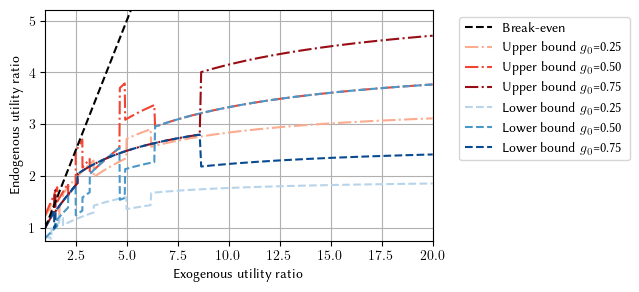

In [117]:
# Compute ratios
k=1
gamma = 0.04
g_values = np.linspace(0.25, 0.75, 3)

upper_colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(g_values)))
lower_colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(g_values))) 

max_ratio = 20
plt.figure(figsize=(5,3))
y_max = 0

for i, g_val in enumerate(g_values):
    g = [g_val]
    b_min = g_val
    b_max = 1 - (1-g_val)/max_ratio
    print(b_max)
    assert b_min <= b_max, f"b_min must be at most b_max: b_min={b_min}, b_max={b_max}"
    b_values = np.linspace(b_min, b_max, 1000)
    ratios_upper = np.zeros(len(b_values))
    ratios_lower = np.zeros(len(b_values))
    
    for j, b_val in enumerate(b_values):
        feasible_ranges = find_feasible_ranges(k=k, rho=1, gamma=gamma, g=g, b=[b_val])
        maximal_ranges = find_maximal_ranges(feasible_ranges)
        if len(maximal_ranges) < 1:
            continue
        assert len(maximal_ranges) == 1, f"feasible_ranges must have exactly one maximal range: feasible_ranges={feasible_ranges}"
        dG_lower = maximal_ranges[0][0]
        dG_upper = maximal_ranges[0][1]
        dB_lower = maximal_ranges[0][2]
        dB_upper = maximal_ranges[0][3]
        # print(dG_lower, dG_upper, dB_lower, dB_upper)
        ratios_upper[j] = uG_upper(g, [b_val], gamma, 1, k, dG_lower, dG_upper, dB_lower, dB_upper) / uB_lower(g, [b_val], gamma, 1, k, dG_lower,dG_upper, dB_lower, dB_upper)
        ratios_lower[j] = uG_lower(g, [b_val], gamma, 1, k, dG_lower, dG_upper, dB_lower, dB_upper) / uB_upper(g, [b_val], gamma, 1, k, dG_lower,dG_upper, dB_lower, dB_upper)

    plt.plot((1-g_val)/(1-b_values), ratios_upper, color=upper_colors[i], linestyle='-.', label=f'Upper bound $g_0$={g_val:.2f}')
    plt.plot((1-g_val)/(1-b_values), ratios_lower, color=lower_colors[i], linestyle='--', label=f'Lower bound $g_0$={g_val:.2f}')
    y_max = max(y_max, max(ratios_upper))
plt.plot([1, max_ratio], [1, max_ratio], 'k--', label='Break-even')  # Add y=x line

handles, labels = plt.gca().get_legend_handles_labels()
order = [len(handles)-1] + [2*i for i in range(len(g_values))] + [2*i+1 for i in range(len(g_values))]
# order = range(len(handles))
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, columnspacing=1)

plt.xlabel('Exogenous utility ratio')
plt.ylabel('Endogenous utility ratio')
# plt.title('Ratio of uG to uB vs 1/b for different g values')
plt.ylim((0.75,y_max+1/2))
plt.xlim((1,max_ratio))

plt.grid(True)

plt.savefig('inequality_ratio_comparison.svg', bbox_inches='tight')


0.9625
0.975
0.9875


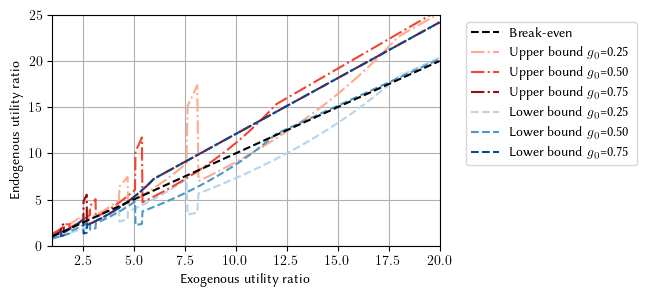

In [118]:
# Compute ratios
k=0
max_ratio = 20
g_values = np.linspace(0.25, 0.75, 3)

upper_colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(g_values)))
lower_colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(g_values))) 

plt.figure(figsize=(5,3))

for i, g_val in enumerate(g_values):
    g = [g_val]
    b_min = g_val
    b_max = 1 - (1-g_val)/max_ratio
    print(b_max)
    assert b_min <= b_max, f"b_min must be at most b_max: b_min={b_min}, b_max={b_max}"
    b_values = np.linspace(b_min, b_max, 1000)
    ratios_upper = np.zeros(len(b_values))
    ratios_lower = np.zeros(len(b_values))
    
    for j, b_val in enumerate(b_values):
        feasible_ranges = find_feasible_ranges(k=k, rho=1, gamma=gamma, g=g, b=[b_val])
        maximal_ranges = find_maximal_ranges(feasible_ranges)
        assert len(maximal_ranges) == 1, f"feasible_ranges must have exactly one maximal range: feasible_ranges={feasible_ranges}"
        dG_lower = maximal_ranges[0][0]
        dG_upper = maximal_ranges[0][1]
        dB_lower = maximal_ranges[0][2]
        dB_upper = maximal_ranges[0][3]
        # print(dG_lower, dG_upper, dB_lower, dB_upper)
        ratios_upper[j] = uG_upper(g, [b_val], gamma, 1, k, dG_lower, dG_upper, dB_lower, dB_upper) / uB_lower(g, [b_val], gamma, 1, k, dG_lower,dG_upper, dB_lower, dB_upper)
        ratios_lower[j] = uG_lower(g, [b_val], gamma, 1, k, dG_lower, dG_upper, dB_lower, dB_upper) / uB_upper(g, [b_val], gamma, 1, k, dG_lower,dG_upper, dB_lower, dB_upper)

    plt.plot((1-g_val)/(1-b_values), ratios_upper, color=upper_colors[i], linestyle='-.', label=f'Upper bound $g_0$={g_val:.2f}')
    plt.plot((1-g_val)/(1-b_values), ratios_lower, color=lower_colors[i], linestyle='--', label=f'Lower bound $g_0$={g_val:.2f}')

plt.plot([1, max_ratio], [1, max_ratio], 'k--', label='Break-even')  # Add y=x line

handles, labels = plt.gca().get_legend_handles_labels()
order = [len(handles)-1] + [2*i for i in range(len(g_values))] + [2*i+1 for i in range(len(g_values))]
# order = range(len(handles))
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, columnspacing=1)

plt.xlabel('Exogenous utility ratio')
plt.ylabel('Endogenous utility ratio')
# plt.title('Ratio of uG to uB vs 1/b for different g values')
plt.ylim((0,max_ratio*1.25))
plt.xlim((1,max_ratio))

plt.grid(True)

plt.savefig('inequality_ratio_comparison_k0.svg', bbox_inches='tight')


[(5, 5, 7, 8)]
[(5, 5, 7, 7)]
[(5, 5, 6, 6)]
[(5, 5, 6, 6)]
[(5, 6, 5, 6)]
[(6, 6, 6, 6)]
[(7, 7, 7, 7)]
[(7, 8, 7, 7)]
[(7, 8, 6, 7)]
[(8, 8, 6, 6)]
[(8, 8, 6, 6)]
[(8, 8, 6, 6)]
[(7, 7, 5, 5)]
[(7, 7, 5, 5)]
[(7, 7, 5, 5)]
[(7, 7, 5, 5)]
[(7, 7, 5, 5)]
[(7, 7, 5, 5)]


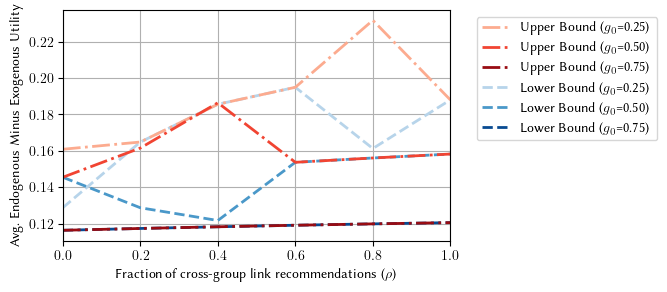

In [123]:
max_ratio_iter = 2
k = 5
gamma = 0.02
g_values = np.linspace(0.25, 0.75, 3)
rho_iter_values = np.array(range(0, k+1)) / k
fig_iter, ax_iter = plt.subplots(figsize=(5,3))

upper_colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(g_values)))
lower_colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(g_values)))

for i, g_val_i in enumerate(g_values):
    g_i = [g_val_i]
    b_val_i = 1 - (1 - g_val_i) / max_ratio_iter
    utility_lower_i = []
    utility_upper_i = []
    for rho_i in rho_iter_values:
        feasible_ranges = find_feasible_ranges(k=k, rho=rho_i, gamma=gamma, g=g_i, b=[b_val_i])
        maximal_ranges = find_maximal_ranges(feasible_ranges)
        assert len(maximal_ranges) == 1, f"Expected one maximal range for g={g_val_i}, rho={rho_i}"
        print(maximal_ranges)
        dG_lower, dG_upper, dB_lower, dB_upper = maximal_ranges[0]
        util_lower = (uG_lower(g_i, [b_val_i], gamma, rho_i, k,
                                 dG_lower, dG_upper, dB_lower, dB_upper) - (1 - g_val_i) +
                      uB_lower(g_i, [b_val_i], gamma, rho_i, k,
                               dG_lower, dG_upper, dB_lower, dB_upper) - (1 - b_val_i))
        util_upper = (uG_upper(g_i, [b_val_i], gamma, rho_i, k,
                                 dG_lower, dG_upper, dB_lower, dB_upper) - (1-g_val_i)+
                      uB_upper(g_i, [b_val_i], gamma, rho_i, k,
                               dG_lower, dG_upper, dB_lower, dB_upper) - (1-b_val_i))
        utility_lower_i.append(util_lower / 2)
        utility_upper_i.append(util_upper / 2)
    utility_lower_i = np.array(utility_lower_i)
    utility_upper_i = np.array(utility_upper_i)
    ax_iter.plot(rho_iter_values, utility_lower_i, color=lower_colors[i], linewidth=2, linestyle="--", label=f"Lower Bound ($g_0$={g_val_i:.2f})")
    ax_iter.plot(rho_iter_values, utility_upper_i, color=upper_colors[i], linewidth=2, linestyle="-.", label=f"Upper Bound ($g_0$={g_val_i:.2f})")
ax_iter.set_xlabel("Fraction of cross-group link recommendations ($\\rho$)")
# ax_iter.set_ylabel("Average Utility ($n^{-1} \\sum_{i \in [n]} u_i(E_\\rho)$)")
ax_iter.set_xlim((0,1))
ax_iter.set_ylabel("Avg. Endogenous Minus Exogenous Utility")
ax_iter.grid(True)
handles, labels = plt.gca().get_legend_handles_labels()
order = [2*i+1 for i in range(len(g_values))] + [2*i for i in range(len(g_values))]
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, columnspacing=1)
# fig_iter.tight_layout()
fig_iter.savefig('utility_bounds_rho.svg', bbox_inches='tight')



3 4 7 8
4 5 6 7
5 5 6 6
5 5 6 6
5 6 5 6
6 6 6 6
6 6 6 6
7 7 7 7
8 8 8 8
9 9 9 9
10 10 10 10
7 7 7 7
7 8 7 7
7 8 6 7
8 8 6 6
8 8 6 6
8 8 6 6
8 8 6 6
9 9 7 7
9 9 8 8
9 9 9 9
10 10 10 10
7 7 4 4
7 7 4 4
7 7 4 4
7 7 4 4
7 7 4 4
7 7 5 5
7 8 6 6
8 8 7 7
8 8 8 8
9 9 9 9
10 10 10 10


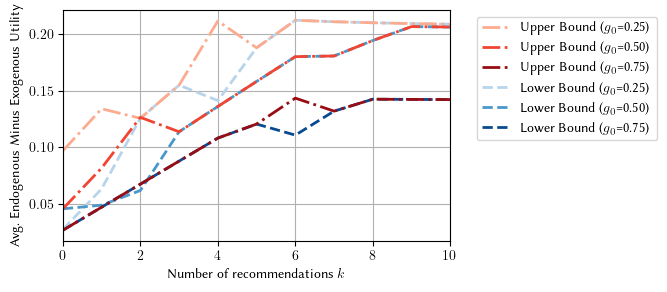

In [125]:
fig_k, ax_k = plt.subplots(figsize=(5,3))
gamma = 0.02
g_values = np.linspace(0.25, 0.75, 3)
k_values = np.arange(0, 11)
upper_colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(g_values)))
lower_colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(g_values)))
y_max = 0
for i, g_val_i in enumerate(g_values):
    g_i = [g_val_i]
    b_val_i = 1 - (1 - g_val_i) / max_ratio_iter
    util_lower_vals = []
    util_upper_vals = []
    for k_val in k_values:
        feasible_ranges = find_feasible_ranges(k=k_val, rho=1, gamma=gamma, g=g_i, b=[b_val_i])
        maximal_ranges = find_maximal_ranges(feasible_ranges)
        assert len(maximal_ranges) == 1, f"Expected one maximal range for g={g_val_i}, k={k_val}"
        dG_lower, dG_upper, dB_lower, dB_upper = maximal_ranges[0]
        print(dG_lower, dG_upper, dB_lower, dB_upper)
        util_lower = (uG_lower(g_i, [b_val_i], gamma, 1, k_val, dG_lower, dG_upper, dB_lower, dB_upper) - (1 - g_val_i) +
                      uB_lower(g_i, [b_val_i], gamma, 1, k_val, dG_lower, dG_upper, dB_lower, dB_upper) - (1 - b_val_i)) / 2
        util_upper = (uG_upper(g_i, [b_val_i], gamma, 1, k_val, dG_lower, dG_upper, dB_lower, dB_upper) - (1 - g_val_i) +
                      uB_upper(g_i, [b_val_i], gamma, 1, k_val, dG_lower, dG_upper, dB_lower, dB_upper) - (1 - b_val_i)) / 2
        util_lower_vals.append(util_lower)
        util_upper_vals.append(util_upper)
    ax_k.plot(k_values, util_lower_vals, color=lower_colors[i], linewidth=2, linestyle="--", label=f"Lower Bound ($g_0$={g_val_i:.2f})")
    ax_k.plot(k_values, util_upper_vals, color=upper_colors[i], linewidth=2, linestyle="-.", label=f"Upper Bound ($g_0$={g_val_i:.2f})")

ax_k.set_xlabel("Number of recommendations $k$")
ax_k.set_ylabel("Avg. Endogenous Minus Exogenous Utility")
handles, labels = ax_k.get_legend_handles_labels()
order = [2*i+1 for i in range(len(g_values))] + [2*i for i in range(len(g_values))]
ax_k.legend([handles[idx] for idx in order], [labels[idx] for idx in order], bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, columnspacing=1)
# fig_k.tight_layout()
ax_k.grid(True)
ax_k.set_xlim((0,max(k_values)))
fig_k.savefig('utility_bounds_k.svg', bbox_inches='tight')


[(1, 2, 1, 2)]
[(1, 2, 0, 1)]


/tmp/ipykernel_9582/3768034161.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  term1 = min([(1 - (1-b[0])/max(ell-1,dB_lower))**(ell - k) for ell in range(dB_lower, dB_upper+1)])


[(1, 2, 0, 1)]
[(1, 2, 0, 1)]
[(1, 2, 0, 1)]
[(1, 2, 0, 1)]
[(1, 2, 0, 1)]
[(1, 2, 0, 1)]
[(1, 2, 0, 1)]
[(1, 2, 0, 1)]
[(1, 3, 1, 3)]
[(1, 3, 0, 1)]
[(1, 3, 0, 1)]
[(1, 3, 0, 1)]
[(1, 3, 0, 1)]
[(1, 3, 0, 1)]
[(1, 3, 0, 1)]
[(1, 3, 0, 1)]
[(1, 3, 0, 1)]
[(1, 3, 0, 1)]
[(1, 3, 1, 3)]
[(1, 3, 0, 1)]
[(1, 3, 0, 1)]
[(1, 3, 0, 1)]
[(1, 3, 0, 1)]
[(1, 3, 0, 1)]
[(1, 3, 0, 1)]
[(1, 3, 0, 1)]
[(1, 3, 0, 1)]
[(1, 3, 0, 1)]
[(2, 4, 2, 4)]
[(2, 4, 0, 1)]
[(2, 4, 0, 1)]
[(2, 4, 0, 1)]
[(2, 4, 0, 1)]
[(2, 4, 0, 1)]
[(2, 4, 0, 1)]
[(2, 4, 0, 1)]
[(2, 4, 0, 1)]
[(2, 4, 0, 1)]
[(3, 4, 3, 4)]
[(3, 4, 0, 1)]
[(3, 4, 0, 1)]
[(3, 4, 0, 1)]
[(3, 4, 0, 1)]
[(3, 4, 0, 1)]
[(3, 4, 0, 1)]
[(3, 4, 0, 1)]
[(3, 4, 0, 1)]
[(3, 4, 0, 1)]
[(3, 5, 3, 5)]
[(3, 5, 1, 1)]
[(3, 5, 0, 1)]
[(3, 5, 0, 1)]
[(3, 5, 0, 1)]
[(3, 5, 0, 1)]
[(3, 5, 0, 1)]
[(3, 5, 0, 1)]
[(3, 5, 0, 1)]
[(3, 5, 0, 1)]
[(3, 5, 3, 5)]
[(3, 5, 1, 1)]
[(3, 5, 0, 1)]
[(3, 5, 0, 1)]
[(3, 5, 0, 1)]
[(3, 5, 0, 1)]
[(3, 5, 0, 1)]
[(3, 5, 0, 1)]
[(3, 5, 0,

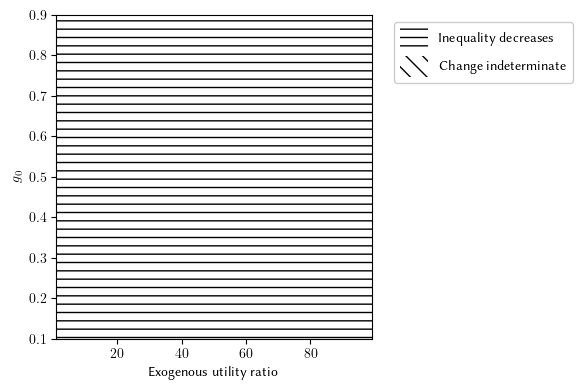

In [74]:
g_values = np.linspace(0.1, 0.9, 10)  # vertical axis values for g_0
ineq_values = np.linspace(1, 99, 10)  # horizontal axis values for b_0
gamma_val = 0.04  # parameter: gamma value
k_val = 0  # parameter: k value
rho_val = 1  # parameter: rho value
fig_heat, ax_heat = plt.subplots(figsize=(6,4))
G_heat, ineq_heat = np.meshgrid(g_values, ineq_values, indexing='ij')
diff_heat = np.full(G_heat.shape, np.nan)
diff = np.full(G_heat.shape, np.nan)
for i in range(G_heat.shape[0]):
    for j in range(G_heat.shape[1]):
        g0 = G_heat[i, j]
        b0 = g0 / ineq_heat[i, j]
        exog = (1 - g0) / (1 - b0)
        feasible = find_feasible_ranges(k=k_val, rho=rho_val, gamma=gamma_val, g=[g0], b=[b0])
        maximal = find_maximal_ranges(feasible)
        print(maximal)
        assert len(maximal) == 1, f"Multiple maximal ranges found for g0={g0}, b0={b0} ({len(maximal)} found)"
        dG_lower, dG_upper, dB_lower, dB_upper = maximal[0]
        cond_upper = uG_upper([g0], [b0], gamma_val, rho_val, k_val, dG_lower, dG_upper, dB_lower, dB_upper) / uB_lower([g0], [b0], gamma_val, rho_val, k_val, dG_lower, dG_upper, dB_lower, dB_upper) 
        cond_lower = uG_lower([g0], [b0], gamma_val, rho_val, k_val, dG_lower, dG_upper, dB_lower, dB_upper) / uB_upper([g0], [b0], gamma_val, rho_val, k_val, dG_lower, dG_upper, dB_lower, dB_upper) 
        diff[i, j] = cond_lower - exog
        diff_heat[i, j] = (1 if cond_lower > exog else 0) - (1 if cond_upper < exog else 0)

levels = [-1, 0, 1]
cs1 = ax_heat.contourf(ineq_heat, G_heat, diff_heat, levels=levels, hatches=['--', '\\\\', '||'], colors='none')
artists, labels = cs1.legend_elements(str_format='{:2.1f}'.format)
ax_heat.legend(artists, ["Inequality decreases", "Change indeterminate", "Inequality increases"], handleheight=2, framealpha=1, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, columnspacing=1)
ax_heat.set_xlabel("Exogenous utility ratio")
ax_heat.set_ylabel("$g_0$")
fig_heat.tight_layout()
fig_heat.savefig("heatmap_k0.svg", bbox_inches="tight")


In [75]:
diff

array([[-0.09801877, -0.90763431, -0.90396864, -0.90268123, -0.90202449,
        -0.90162618, -0.90135883, -0.90116698, -0.9010226 , -0.90091001],
       [-0.19464203, -0.82420597, -0.81789364, -0.81568758, -0.81456438,
        -0.81388386, -0.8134274 , -0.81309999, -0.81285367, -0.81266164],
       [-0.25148528, -0.73950027, -0.73113855, -0.72823073, -0.7267531 ,
        -0.72585879, -0.72525932, -0.72482952, -0.72450629, -0.72425436],
       [-0.23810314, -0.65348762, -0.64369526, -0.64030697, -0.63858855,
        -0.63754959, -0.63685363, -0.63635487, -0.63597991, -0.63568773],
       [-0.19129819, -0.56613757, -0.55555556, -0.55191257, -0.55006859,
        -0.5489549 , -0.54820937, -0.54767533, -0.54727398, -0.54696133],
       [-0.29597632, -0.03771552, -0.46671109, -0.46304372, -0.46119106,
        -0.46007331, -0.45932556, -0.45879019, -0.45838797, -0.45807471],
       [-0.35447165, -0.04738126, -0.37715337, -0.3736966 , -0.37195379,
        -0.37090344, -0.37020125, -0.36969873

In [76]:
diff_heat

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
# Compute ratios for contour plot
# k = 3
# gamma = 0.05
g_val = 0.5  # Choose a single g value
g = [g_val]
max_ratio = 3
rho_values = np.array(range(0, k+1))/k
b_min = g_val
b_max = 1 - (1-g_val)/max_ratio
assert b_min <= b_max, f"b_min must be at most b_max: b_min={b_min}, b_max={b_max}"
b_values = np.linspace(b_min, b_max, 200)
X, Y = np.meshgrid((1-g_val)/(1-b_values), rho_values)

Z_upper = np.zeros((len(rho_values), len(b_values)))
Z_lower = np.zeros((len(rho_values), len(b_values)))

for i, rho in enumerate(rho_values):
    for j, b_val in enumerate(b_values):
        feasible_ranges = find_feasible_ranges(k=k, rho=rho, gamma=gamma, g=g, b=[b_val])
        maximal_ranges = find_maximal_ranges(feasible_ranges)
        assert len(maximal_ranges) == 1, f"feasible_ranges must have exactly one maximal range: feasible_ranges={feasible_ranges}, rho={rho}, b_val={b_val}"
        dG_lower = maximal_ranges[0][0]
        dG_upper = maximal_ranges[0][1]
        dB_lower = maximal_ranges[0][2]
        dB_upper = maximal_ranges[0][3]
        Z_upper[i,j] = uG_upper(g, [b_val], gamma, rho, k, dG_lower, dG_upper, dB_lower, dB_upper) / uB_lower(g, [b_val], gamma, rho, k, dG_lower, dG_upper, dB_lower, dB_upper) < (1-g_val)/(1-b_val)
        Z_lower[i,j] = uG_lower(g, [b_val], gamma, rho, k, dG_lower, dG_upper, dB_lower, dB_upper) / uB_upper(g, [b_val], gamma, rho, k, dG_lower, dG_upper, dB_lower, dB_upper) > (1-g_val)/(1-b_val)

fig, (ax1) = plt.subplots(1, 1, figsize=(4,3))

levels = [-1, 0, 1]
cs1 = ax1.contourf(X, Y, Z_upper - Z_lower, levels=levels, hatches=['--', '\\\\'], colors='none')
artists, labels = cs1.legend_elements(str_format='{:2.1f}'.format)
ax1.legend(artists, ["Change indeterminate", "Inequality decreases"], handleheight=2, framealpha=1, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, columnspacing=1)

ax1.set_xlabel('Exogenous utility ratio')
ax1.set_ylabel('Frac. cross-group link recommendations $\\rho$')

plt.savefig('inequality_ratio_contours.svg', bbox_inches='tight')


KeyboardInterrupt: 

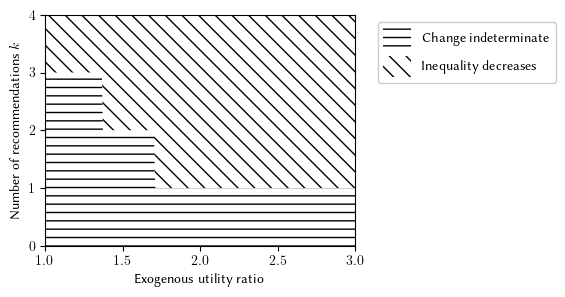

In [8]:
# Compute ratios for contour plot with varying k
gamma = 0.05
g_val = 0.5  # Choose a single g value
g = [g_val]
max_ratio = 3
rho = 1  # Fixed rho value
k_values = np.arange(0, 5)  # Range of k values
b_min = g_val
b_max = 1 - (1-g_val)/max_ratio
assert b_min <= b_max, f"b_min must be at most b_max: b_min={b_min}, b_max={b_max}"
b_values = np.linspace(b_min, b_max, 200)
X, Y = np.meshgrid((1-g_val)/(1-b_values), k_values)

Z_upper = np.zeros((len(k_values), len(b_values)))
Z_lower = np.zeros((len(k_values), len(b_values)))

for i, k in enumerate(k_values):
    for j, b_val in enumerate(b_values):
        feasible_ranges = find_feasible_ranges(k=k, rho=rho, gamma=gamma, g=g, b=[b_val])
        maximal_ranges = find_maximal_ranges(feasible_ranges)
        assert len(maximal_ranges) == 1, f"feasible_ranges must have exactly one maximal range: feasible_ranges={feasible_ranges}, k={k}, b_val={b_val}"
        dG_lower = maximal_ranges[0][0]
        dG_upper = maximal_ranges[0][1]
        dB_lower = maximal_ranges[0][2]
        dB_upper = maximal_ranges[0][3]
        Z_upper[i,j] = uG_upper(g, [b_val], gamma, rho, k, dG_lower, dG_upper, dB_lower, dB_upper) / uB_lower(g, [b_val], gamma, rho, k, dG_lower, dG_upper, dB_lower, dB_upper) < (1-g_val)/(1-b_val)
        Z_lower[i,j] = uG_lower(g, [b_val], gamma, rho, k, dG_lower, dG_upper, dB_lower, dB_upper) / uB_upper(g, [b_val], gamma, rho, k, dG_lower, dG_upper, dB_lower, dB_upper) > (1-g_val)/(1-b_val)

fig, (ax1) = plt.subplots(1, 1, figsize=(4,3))

levels = [-1, 0, 1]
cs1 = ax1.contourf(X, Y, Z_upper - Z_lower, levels=levels, hatches=['--', '\\\\'], colors='none')
artists, labels = cs1.legend_elements(str_format='{:2.1f}'.format)
ax1.legend(artists, ["Change indeterminate", "Inequality decreases"], handleheight=2, framealpha=1, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, columnspacing=1)

ax1.set_xlabel('Exogenous utility ratio')
ax1.set_ylabel('Number of recommendations $k$')
from matplotlib.ticker import MaxNLocator
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))


plt.savefig('inequality_ratio_contours_k.svg', bbox_inches='tight')


In [32]:
def dfpne_g_d(g, b, gamma, dg_lower, dg_upper, db_lower, db_upper, k, rho):
    """ Function for determining whether a given degree is in a DFPNE degree range for group G. """
    if d == 0:
        cond1 = True
        cond2 = g*(1-g) <= gamma
        if type(g) == float:
            utils = np.full((len(b), len(b)), g)
        else:
            utils = g.copy()
    elif bounds == "heuristic":
        cond1 = gamma / ((1-g)*g) <= (1 - g/d)**(d-1)/d
        cond2 = (1 - g/d)**d/(d+1) <= gamma / ((1-g)*g) 
        utils = 1 - (1-g) * (1 - g/d)**d - gamma*d
    elif bounds == "proven":
        cond1 = gamma / ((1-g)*g) <= (1 - g/(d+1))**(d-1) / np.maximum(d-g/b, 1)
        cond2 = (1 - g/max(d-1, 1))**d / (d+1+g/b) <= gamma / ((1-g)*g)
        utils = 1 - (1-g)*(1 - g/(d+1))**d - gamma * d
    elif bounds == "improved":
        # no sever: 
        djb_range_lower = np.ceil(b/g*d-1).astype(int)
        djb_range_upper = (np.floor(b/g*(d+1))+1).astype(int)
        djb_range_lower_min = np.min(djb_range_lower)
        djb_range_upper_max = np.max(djb_range_upper)
        cond1b = False
        for dj in range(max(djb_range_lower_min, 1), djb_range_upper_max+1):
            cond1b = np.logical_or(cond1b, gamma / ((1-g)*b) <= 1/dj*(1-b/dj)**(d-1))# j in B
        djg_range = range(max(d-1, 1), d+2)
        cond1g = gamma / ((1-g)*g) <= np.maximum.reduce([1/dj*(1-g/dj)**(d-1) for dj in djg_range])# j in G
        cond1 = np.logical_or(cond1b, cond1g)
        # no create: assumption is that there exists someone unconnected of same degree. true for i in S?
        cond2 = 1 / d * (1 - g/max(d-1, 1))**d <= gamma / ((1-g)*g) 
        # utils
        if util == "simple":
            utils = 1 - (1-g)*np.exp(-g) - gamma * d
        else:
            utils = 1 - (1-g)*(1 - g/(d+1))**d - gamma*d  
    utils[np.invert(cond1) | np.invert(cond2)] = np.nan
    return utils

def dfpne_g(g, b, gamma, rng, bounds="heuristic", util="simple"):
    mat = np.fmin.reduce([dfpne_g_d(g, b, gamma, d, bounds, util) for d in rng])
    return mat

def dfpne_b_d(g, b, gamma, d, bounds="heuristic", util="simple"):
    if d == 0:
        # can't sever
        cond1 = True
        # no create
        cond2 = (1-b)*b <= gamma
        utils = b.copy()
    elif d == 1: 
        cond1 = gamma / ((1-b)*b) >= (1 - b/d)**d/(d+1)
        cond2 = gamma / ((1-b)*b) <= (1 - b/d)**(d-1)/d
        utils = 1 - (1-b) * (1 - b/d)**d - gamma*d
    else:
        # no sever:
        dib_range = range(max(d-1, 1), d+2)
        cond1b = gamma / ((1-b)*b) <= np.maximum.reduce([1/di*(1-b/di)**(d-1) for di in dib_range])
        dig_range_lower = np.ceil(g/b*d-1).astype(int)
        dig_range_upper = (np.floor(g/b*(d+1))+1).astype(int)
        dig_range_lower_min = np.min(dig_range_lower)
        dig_range_upper_max = np.max(dig_range_upper)
        cond1g = False
        for di in range(max(dig_range_lower_min, 1), dig_range_upper_max+1):
            cond1g = np.logical_or(cond1g, gamma / ((1-b)*g) <= 1/di*(1-g/di)**(d-1))
        cond1 = np.logical_or(cond1b, cond1g)
        # no create:
        cond2 = 1 / d * (1 - b/max(d-1, 1))**d <= gamma / ((1-b)*b)
        if util == "simple":
            utils = 1 - (1-b) * np.exp(-b) - gamma * d
        else:
            utils = 1 - (1-b)*(1 - b/(max(d-1, 1)))**d - gamma*d
    utils[np.invert(cond1) | np.invert(cond2)] = np.nan
    return utils
    
def dfpne_b(g, b, gamma, rng, bounds="heuristic", util="simple"):
    mat = np.fmax.reduce([dfpne_b_d(g, b, gamma, d, bounds, util) for d in rng])
    return mat
    

In [33]:
# Plotting Function
def plot_contours(K, fontsize, levels, ticks, tick_labs, bounds="heuristic", util="simple", gammamax=0.1, mu_high = 1/2, factor_max = 20, title=""):
    epsilon = 0.0001
    grid_size = 50
    factors = np.linspace(1, factor_max, grid_size)
    gamma = np.linspace(0.01 + epsilon, gammamax - epsilon, grid_size)
    Gamma, Factors = np.meshgrid(gamma, factors)
    #Z = nash_eq_lb(K, mu_high, Gamma) / nash_eq_ub(K, mu_high / Factors, Gamma) / Factors
    Z = dfpne_g(mu_high, mu_high / Factors, Gamma, np.arange(K, -1, -1), bounds, util) / dfpne_b(mu_high, mu_high / Factors, Gamma, np.arange(0, K, 1), bounds, util) / Factors

    fig = plt.figure(figsize=(6, 3), dpi=600)
    ax = fig.add_subplot()
    contour = ax.contourf(Factors, Gamma, Z, levels=levels, cmap=cm.turbo)
    ax.set_xlabel(r"Exogenous opportunity ratio $(\mu_G / \mu_B)$, setting $\mu_G$ = " + f"${mu_high * 2 - 1 + (1-mu_high)}$", fontsize=fontsize)
    ax.set_ylabel(r"Connection cost $(\gamma)$", fontsize=fontsize)
    ax.set_title("")
    cbar = fig.colorbar(contour, ticks=ticks)
    cbar.ax.set_yticklabels(tick_labs)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    cbar.ax.tick_params(axis='both', which='major', labelsize=fontsize)
    for spine in ax.spines.values():
        spine.set_visible(False)
    for spine in cbar.ax.spines.values():
        spine.set_visible(False)
    ax.plot(factors, [mu_high*(1-mu_high) for _ in range(grid_size)], color="black")
    ax.plot(factors, mu_high / factors * (1-mu_high / factors), color="black")
    ax.set_ylim((epsilon, gammamax))
    fig.suptitle(title)
    return fig, ax

# The network makes inequality worse in equilibrium (if the platform does not intervene)

In the plots that follow, we explore what in parts of the parameter space we can show that the network makes inequality worse in equilibrium. On each x-axis, we plot the exogenous inequality ratio, which in all cases is defined as $g_2 / b_2$. On the y-axis, we plot connection costs $\gamma$. The color at a particular point on the plot is determined by a **lower bound** on the 

The first plot (titled "Heuristic degree bounds"), shows bounds that we could prove if $p_{i2} / d_i = p_{j2}/ d_j$, *exactly* for almost all connected pairs $i,j$. It is heuristic because, in the model, the equality only needs to hold *approximately*. Thus, this plot does not represent a true lower bound on inequality, just a quick-and-dirty intuition-builder. In some sense, we can think about this plot as a best-case analysis, since it does not account for the fact that we need to account for the fact that reciprocity holds only approximately.

In [34]:
K = 250
fontsize = 16
poa_max = 1.5
poa_min = 1
levels = np.linspace(poa_min, poa_max, K)
ticks = np.linspace(poa_min, poa_max, 5)
tick_labs = [f"${f:.2f}$" for f in ticks]
bounds = "heuristic"

fig, ax = plot_contours(K, fontsize, levels, ticks, tick_labs, mu_high=0.5, gammamax=0.08, factor_max=20, bounds=bounds, title="Heuristic degree bounds")
#plt.savefig("oblivious_edge_costs_lb.png", bbox_inches='tight')


TypeError: dfpne_g_d() missing 3 required positional arguments: 'db_upper', 'k', and 'rho'

Next, we plot bounds that naively bounds approximate reciprocity. It is naive because the lower bound on privileged group members, we plot what happens if a person has exclusively connections to other privileged group members of degree one more than theirs and can only sever a connection to someone of degree one less than theirs. This time, we only plot values *less* than 1. (See the scale.)

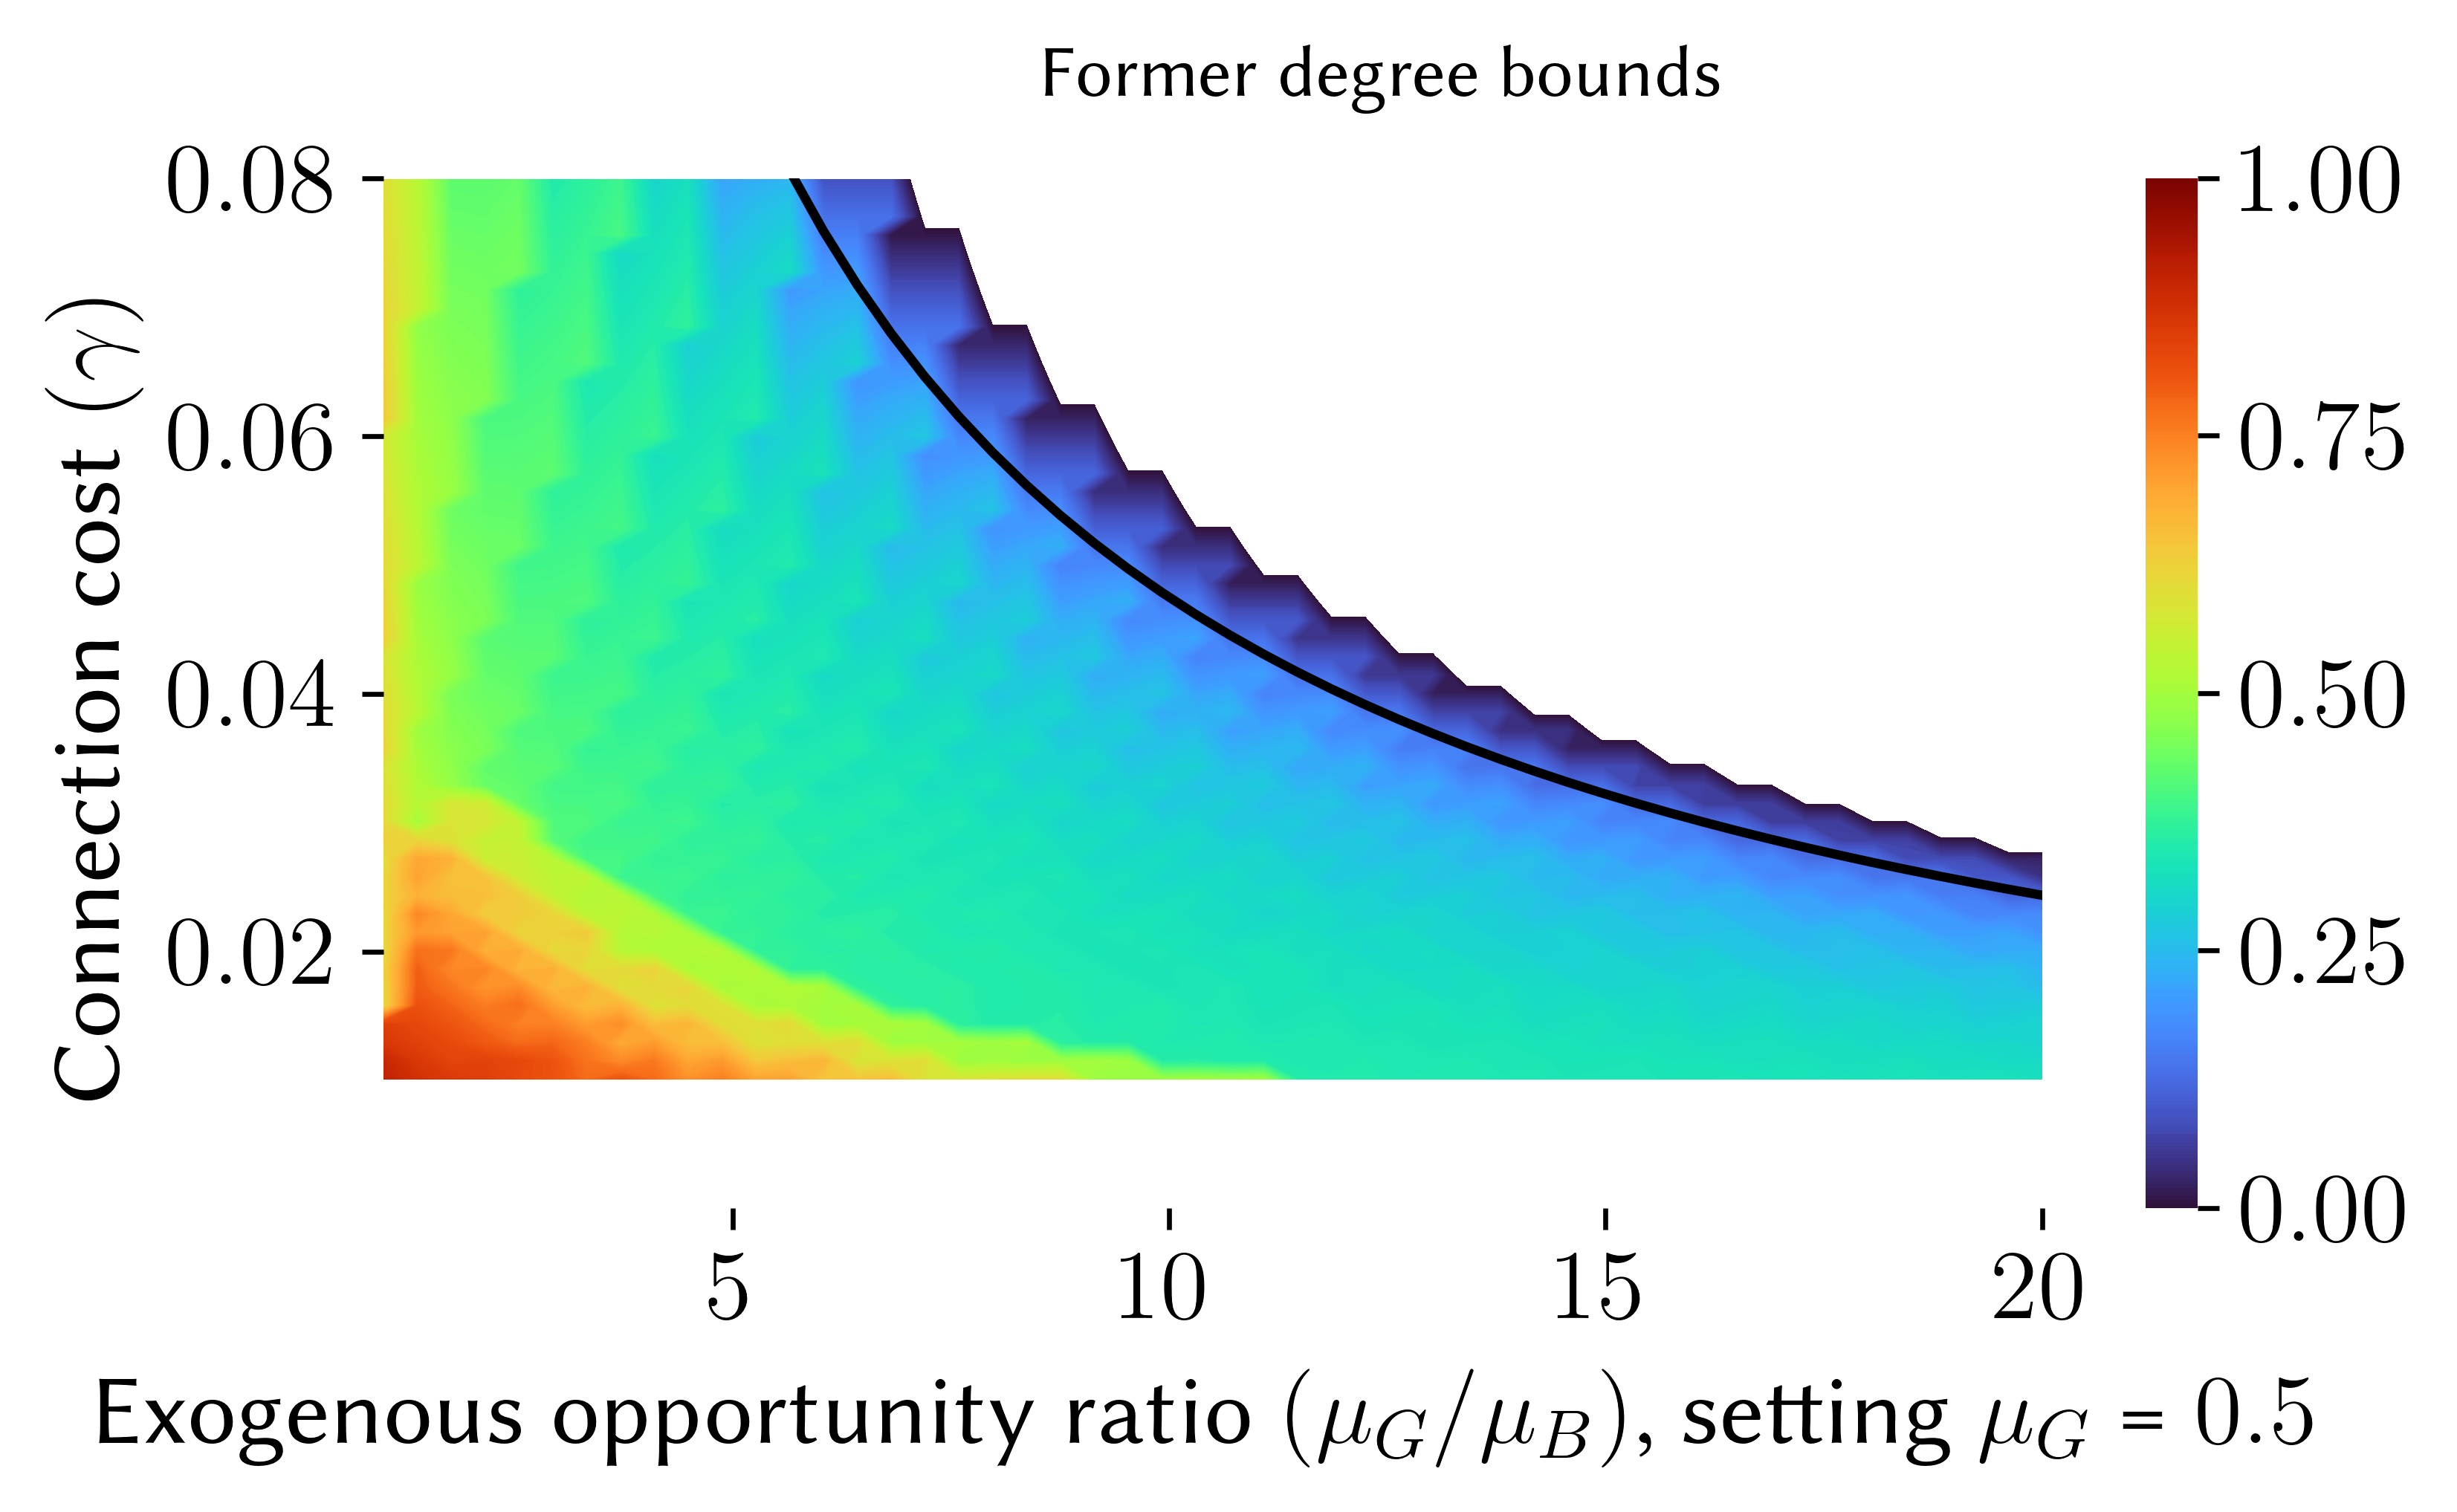

In [6]:
K = 250
fontsize = 16
poa_max = 1
poa_min = 0
levels = np.linspace(poa_min, poa_max, K)
ticks = np.linspace(poa_min, poa_max, 5)
tick_labs = [f"${f:.2f}$" for f in ticks]
bounds = "proven"

fig, ax = plot_contours(K, fontsize, levels, ticks, tick_labs, mu_high=0.5, gammamax=0.08, factor_max = 20, bounds=bounds, title="Former degree bounds")
#plt.savefig("oblivious_edge_costs_lb.png", bbox_inches='tight')

Next, we demonstrate improved degree bounds that account for the fact that, in equilibrium, a person will not sever a connection to their *least* valuable connection. These are the bounds proved in the Overleaf as of 8/21. 

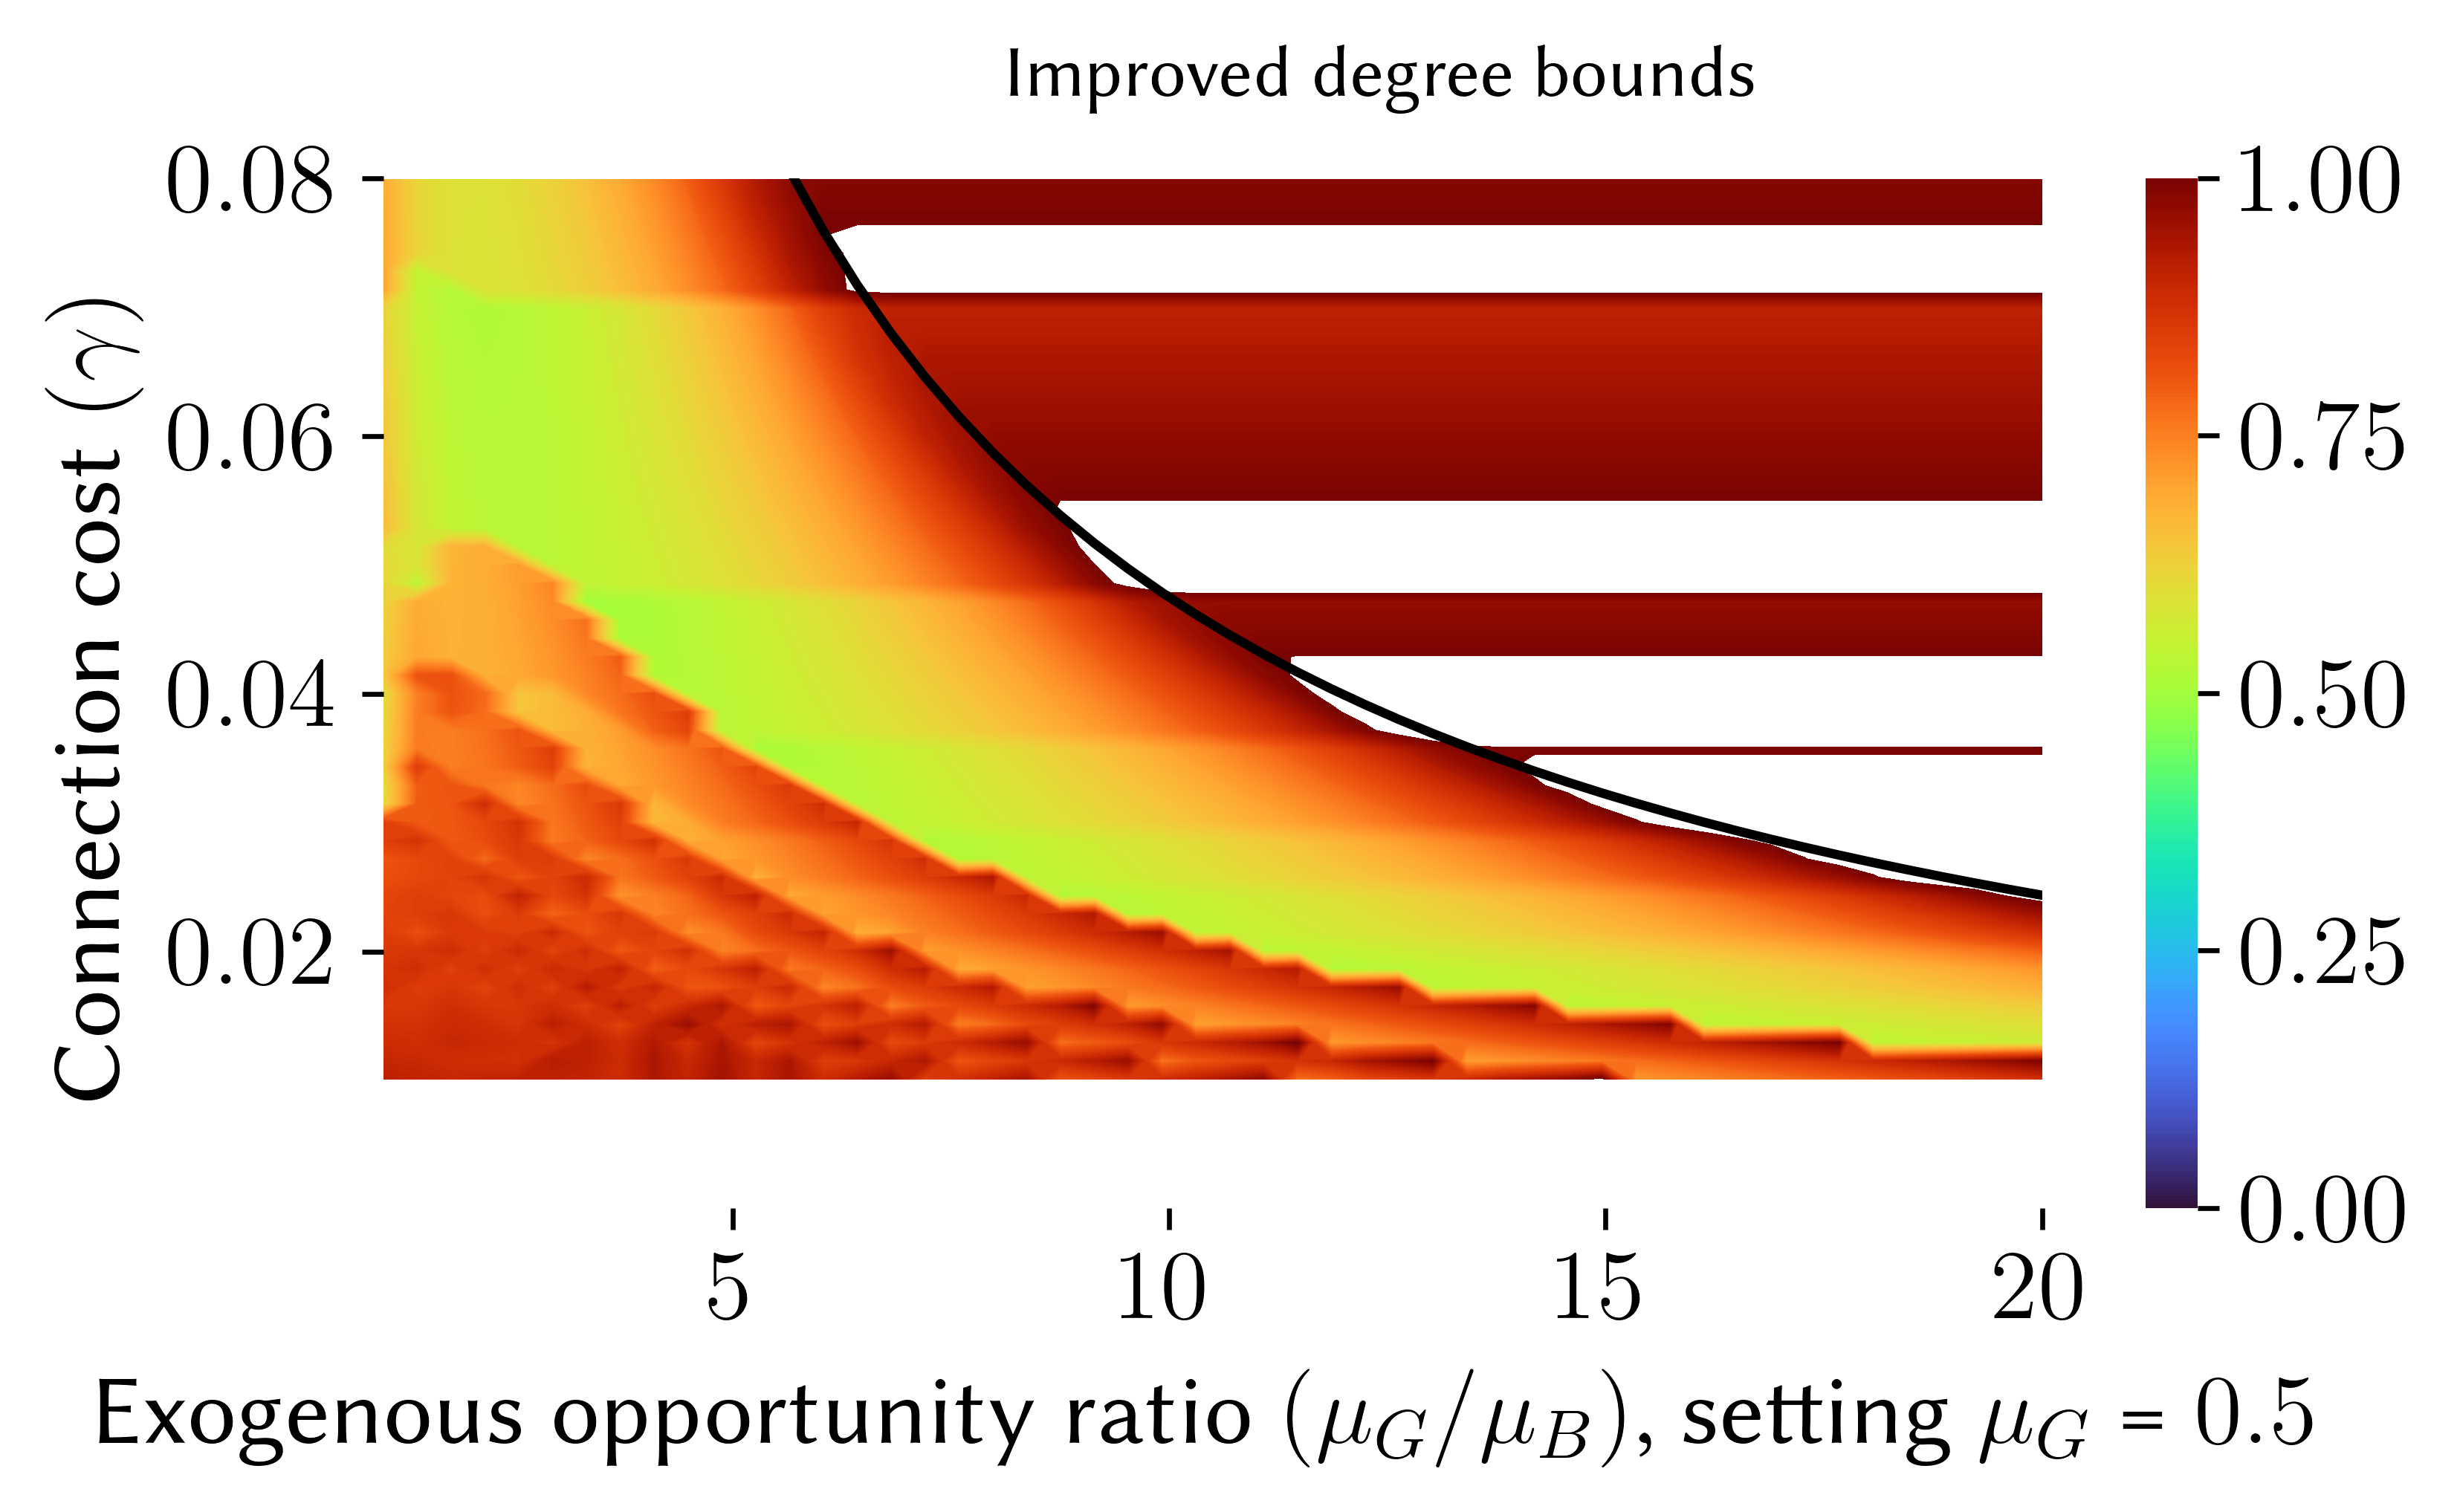

In [7]:
K = 250
fontsize = 16
poa_max = 1
poa_min = 0
levels = np.linspace(poa_min, poa_max, K)
ticks = np.linspace(poa_min, poa_max, 5)
tick_labs = [f"${f:.2f}$" for f in ticks]
bounds = "improved"

fig, ax = plot_contours(K, fontsize, levels, ticks, tick_labs, mu_high=0.5, gammamax=0.08, bounds=bounds, factor_max=20, util="complex", title="Improved degree bounds")
#plt.savefig("oblivious_edge_costs_lb.png", bbox_inches='tight')

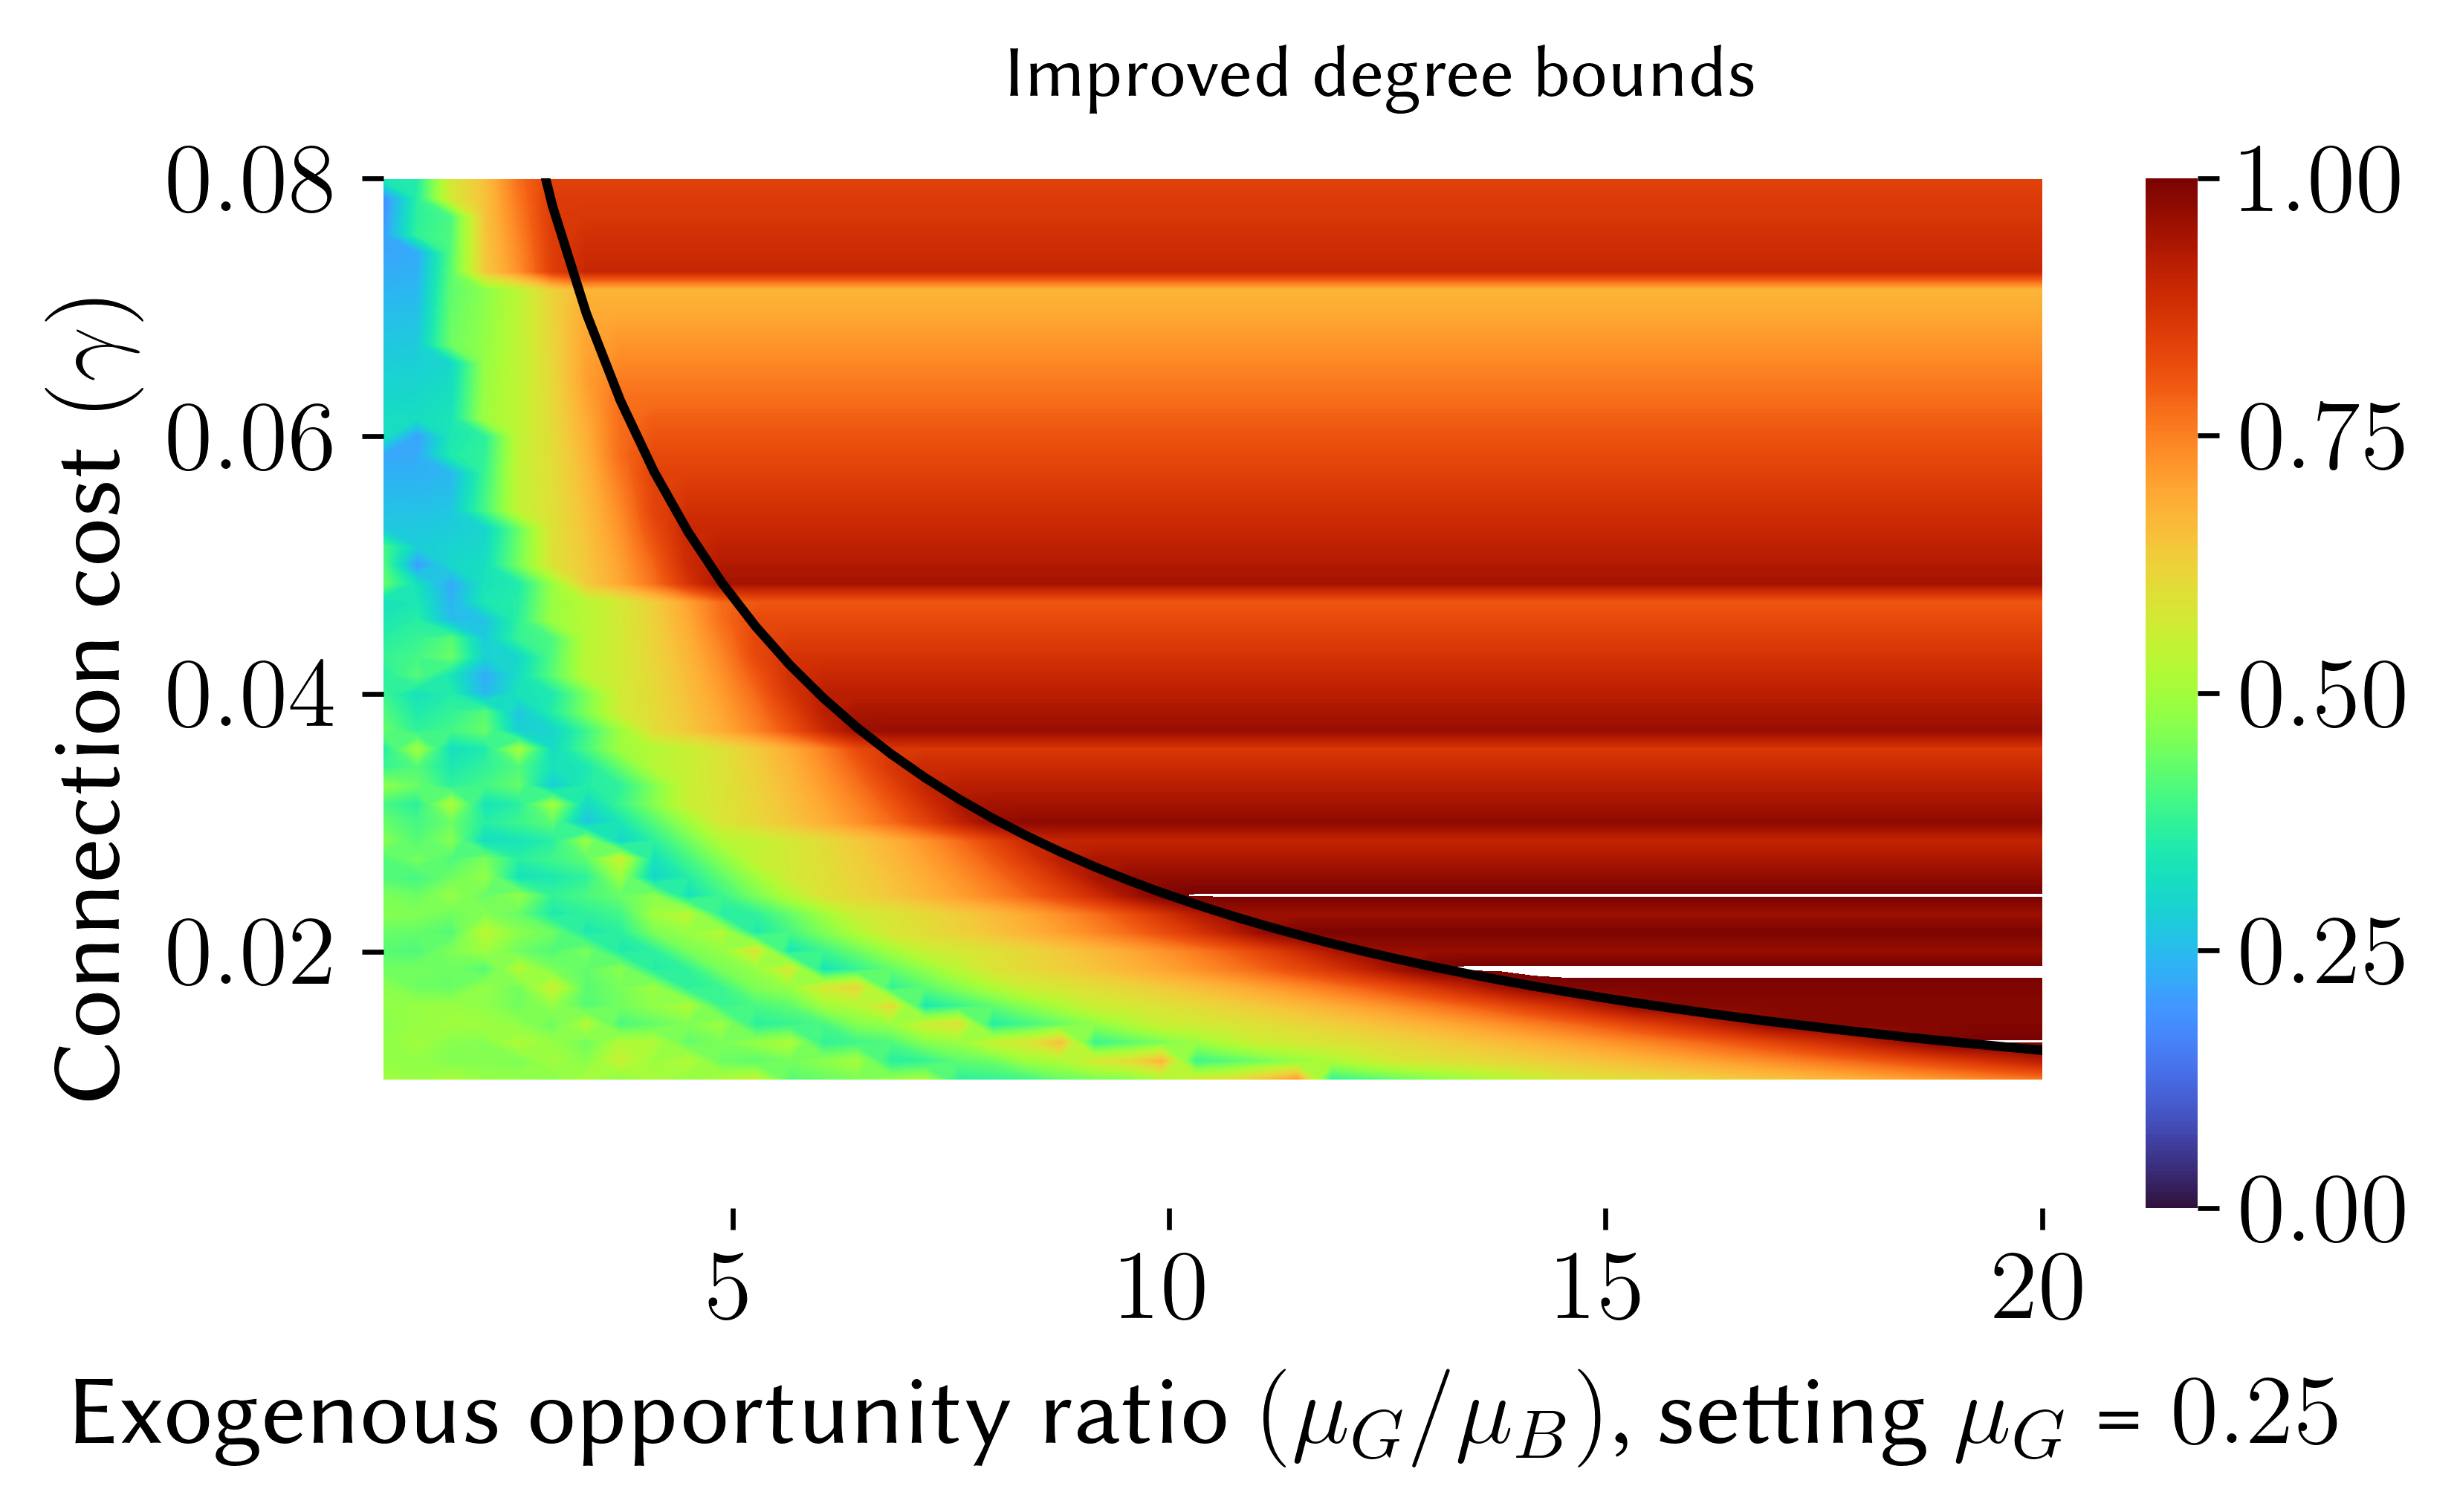

In [8]:
K = 250
fontsize = 16
poa_max = 1
poa_min = 0
levels = np.linspace(poa_min, poa_max, K)
ticks = np.linspace(poa_min, poa_max, 5)
tick_labs = [f"${f:.2f}$" for f in ticks]
bounds = "improved"

fig, ax = plot_contours(K, fontsize, levels, ticks, tick_labs, mu_high=0.25, gammamax=0.08, bounds=bounds, factor_max=20, util="complex", title="Improved degree bounds")
#plt.savefig("oblivious_edge_costs_lb.png", bbox_inches='tight')

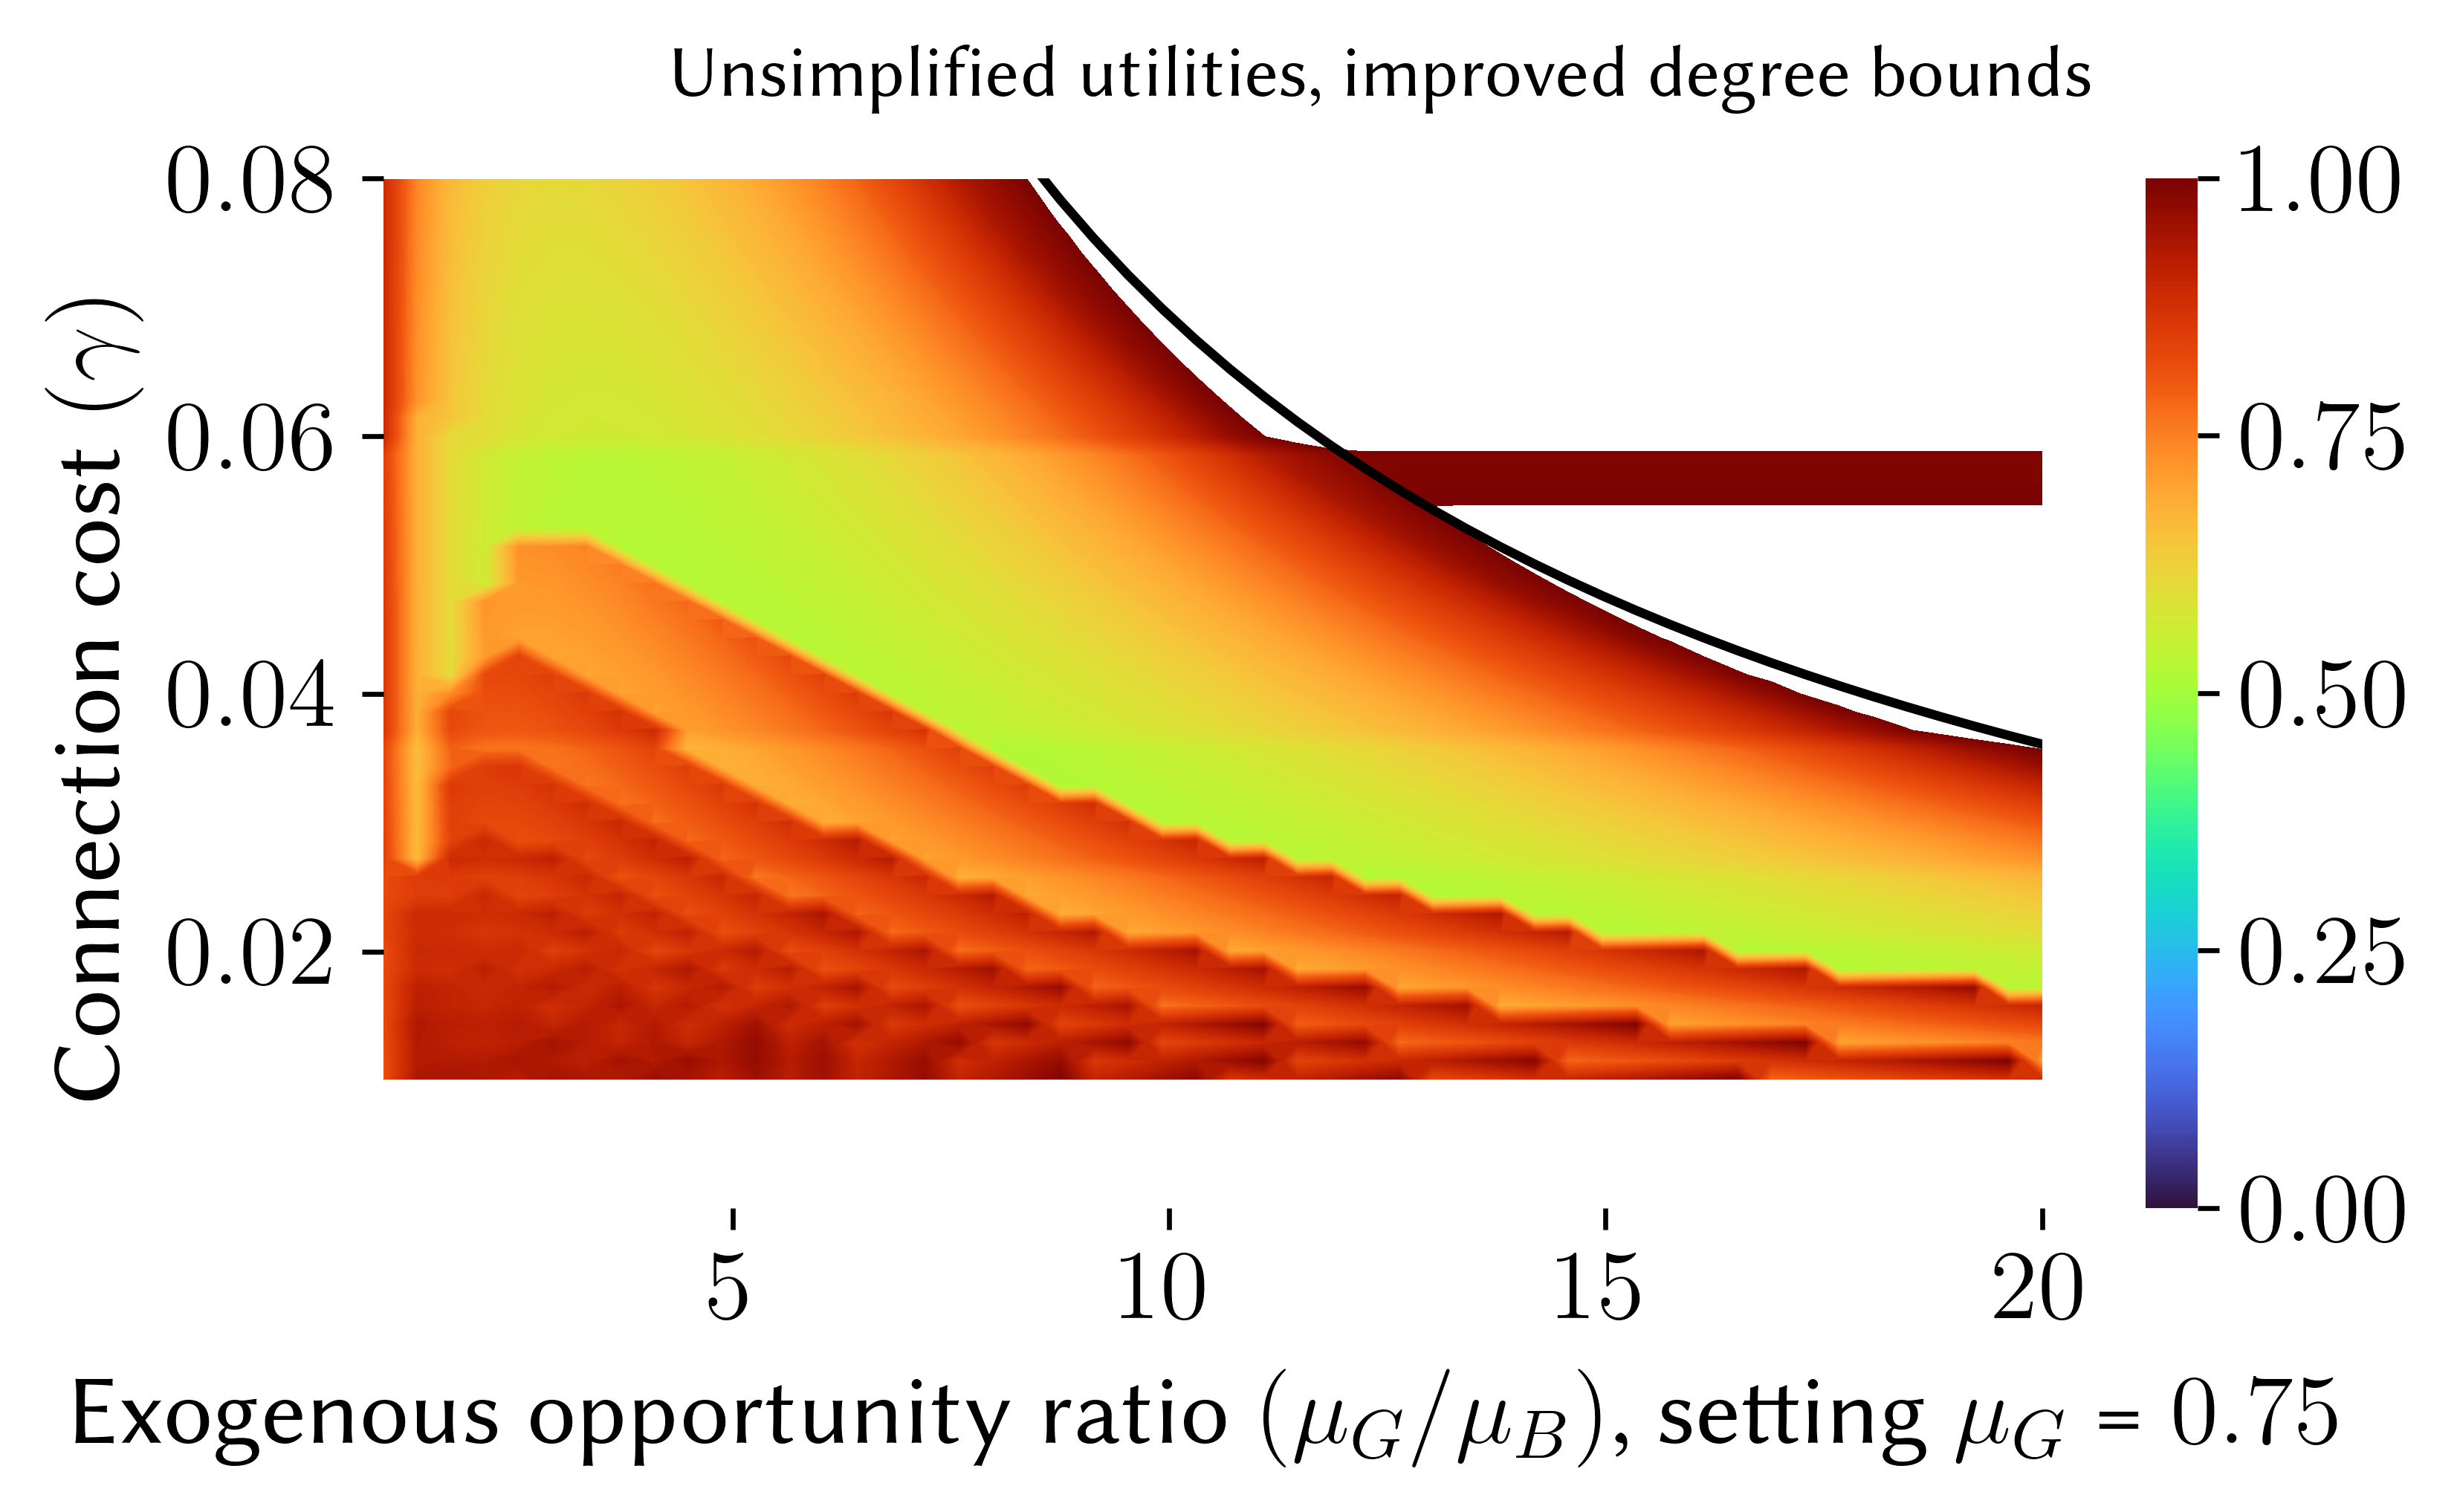

In [9]:
K = 250
fontsize = 16
poa_max = 1
poa_min = 0
levels = np.linspace(poa_min, poa_max, K)
ticks = np.linspace(poa_min, poa_max, 5)
tick_labs = [f"${f:.2f}$" for f in ticks]
bounds = "improved"

fig, ax = plot_contours(K, fontsize, levels, ticks, tick_labs, mu_high=0.75, gammamax=0.08, bounds=bounds, factor_max=20, util="complex", title="Unsimplified utilities, improved degree bounds")
#plt.savefig("oblivious_edge_costs_lb.png", bbox_inches='tight')

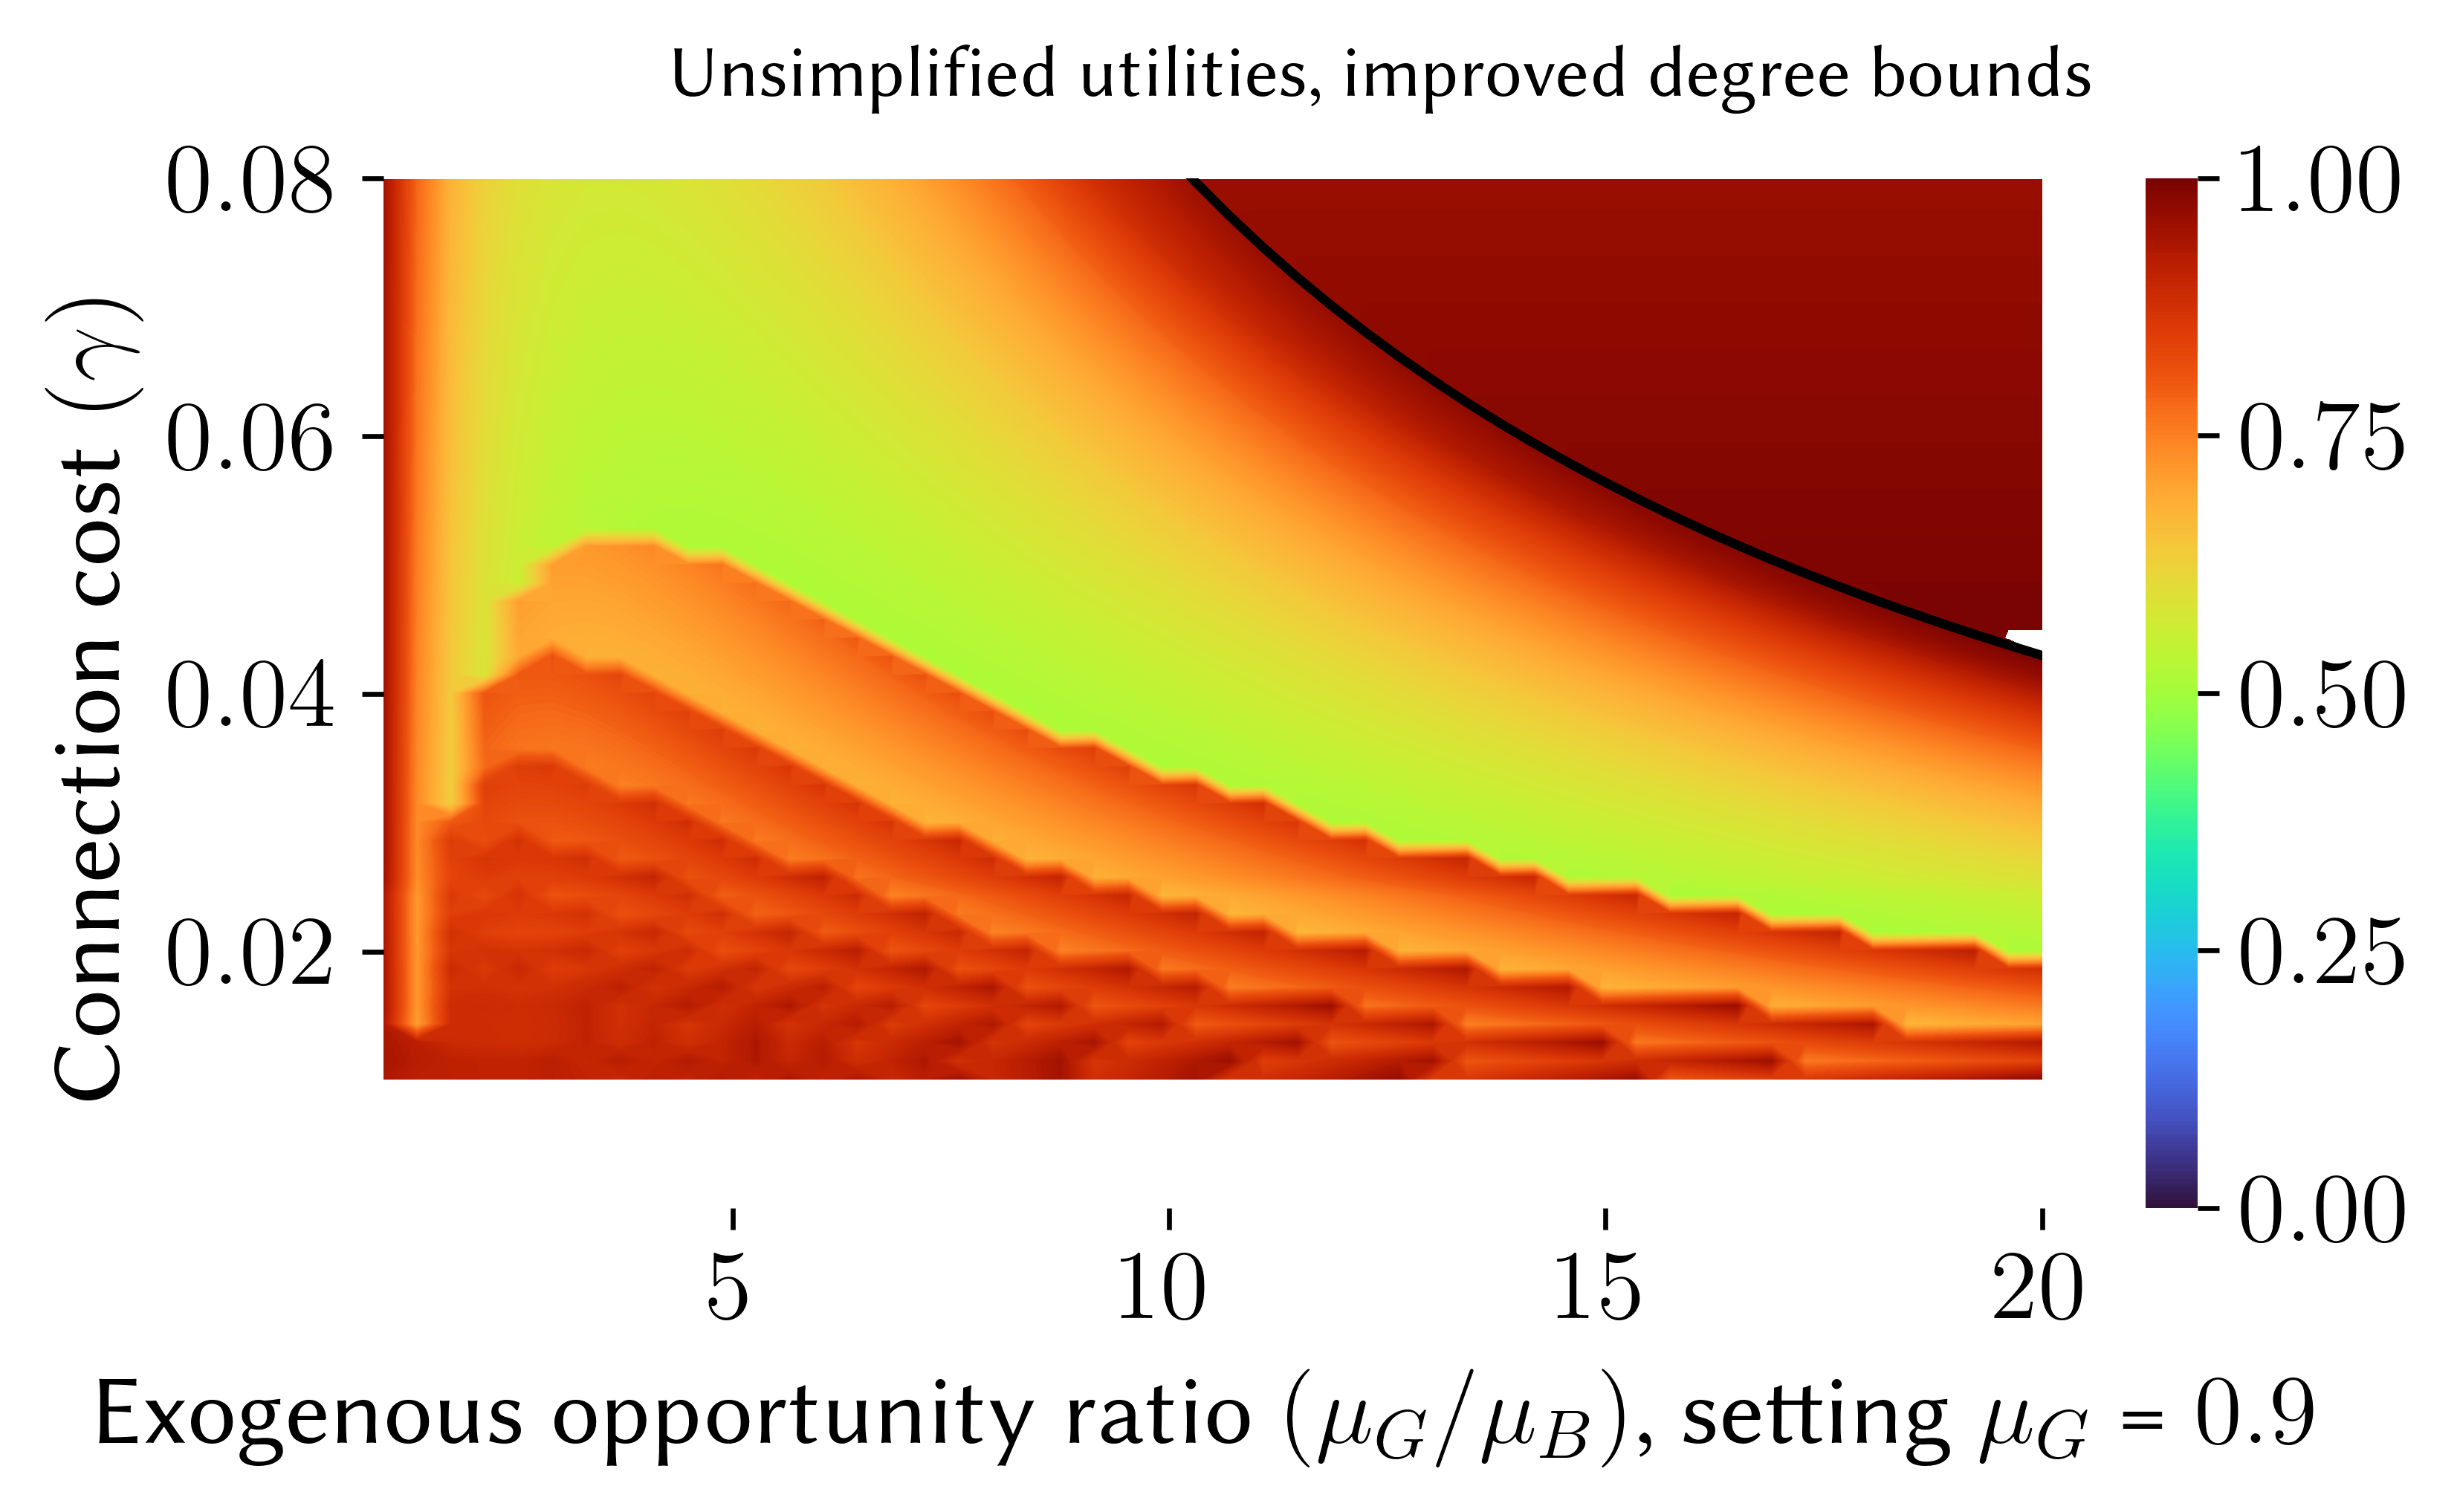

In [10]:
K = 250
fontsize = 16
poa_max = 1
poa_min = 0
levels = np.linspace(poa_min, poa_max, K)
ticks = np.linspace(poa_min, poa_max, 5)
tick_labs = [f"${f:.2f}$" for f in ticks]
bounds = "improved"

fig, ax = plot_contours(K, fontsize, levels, ticks, tick_labs, mu_high=0.9, gammamax=0.08, bounds=bounds, factor_max=20, util="complex", title="Unsimplified utilities, improved degree bounds")
#plt.savefig("oblivious_edge_costs_lb.png", bbox_inches='tight')

# Degree bounds on equilibria under $k=1$ edge recommendations 

In [48]:
k = 1

def feasible_sever_G(g2, b2, d_j, deg_g_upper, deg_g_lower,deg_b_upper, deg_b_lower, gamma, rho):
    x = max([(1-g2)*g2/ell * (1 - g2/ell)**(d_j - k -1) * (1 - b2/deg_b_upper)**(rho * k) * (1 - g2/deg_g_upper)**((1-rho)* k) for ell in range(max(d_j - 1, 1), d_j + 2)])
    return x >= gamma

def feasible_sever_B(g2, b2, d_j, deg_g_upper, deg_g_lower,deg_b_upper, deg_b_lower, gamma, rho):
    x = max([(1-b2)*b2/ell * (1 - b2/ell)**(d_j - k -1) * (1 - g2/deg_g_upper)**(rho * k) * (1 - b2/deg_b_upper)**((1-rho) * k) for ell in range(max(d_j - 1, 1), d_j + 2)])
    return x >= gamma

def feasible_connect_G(g2, b2, d_i, deg_g_upper, deg_g_lower,deg_b_upper, deg_b_lower, gamma, rho):
    x = (1-g2)*g2/(d_i + 1) * (1 - g2/(d_i+1))**(d_i - k) * (1 - b2/deg_b_lower)**(rho * k) * (1 - g2/deg_g_lower)**((1-rho)* k)
    return x <= gamma

def feasible_connect_B(g2, b2, d_i, deg_g_upper, deg_g_lower,deg_b_upper, deg_b_lower, gamma, rho):
    x = (1-b2)*b2/(d_i + 1) * (1 - g2/(d_i+1))**(d_i - k) * (1 - g2/deg_g_lower)**(rho * k) * (1 - b2/deg_b_lower)**((1-rho) * k) 
    return x <= gamma

def feasible_G(deg_g_upper, deg_g_lower, deg_b_upper, deg_b_lower, g2, b2, gamma, rho):
    sever_upper = feasible_sever_G(g2, b2, deg_g_upper, deg_g_upper, deg_g_lower, deg_b_upper, deg_b_lower, gamma, rho)
    sever_lower = feasible_sever_G(g2, b2, deg_g_lower, deg_g_upper, deg_g_lower, deg_b_upper, deg_b_lower, gamma, rho)
    connect_upper = feasible_connect_G(g2, b2, deg_g_upper, deg_g_upper, deg_g_lower, deg_b_upper, deg_b_lower, gamma, rho)
    connect_lower = feasible_connect_G(g2, b2, deg_g_lower, deg_g_upper, deg_g_lower, deg_b_upper, deg_b_lower, gamma, rho)
    return sever_upper & sever_lower & connect_upper & connect_lower

def feasible_B(deg_g_upper, deg_g_lower, deg_b_upper, deg_b_lower, g2, b2, gamma, rho):
    sever_upper = feasible_sever_B(g2, b2, deg_b_upper, deg_g_upper, deg_g_lower, deg_b_upper, deg_b_lower, gamma, rho)
    sever_lower = feasible_sever_B(g2, b2, deg_b_lower, deg_g_upper, deg_g_lower, deg_b_upper, deg_b_lower, gamma, rho)
    connect_upper = feasible_connect_B(g2, b2, deg_b_upper, deg_g_upper, deg_g_lower, deg_b_upper, deg_b_lower, gamma, rho)
    connect_lower = feasible_connect_B(g2, b2, deg_b_lower, deg_g_upper, deg_g_lower, deg_b_upper, deg_b_lower, gamma, rho)
    return sever_upper & sever_lower & connect_upper & connect_lower

def feasible_all(deg_g_upper, deg_g_lower, deg_b_upper, deg_b_lower, g2, b2, gamma, rho):
    g_feasible = feasible_G(deg_g_upper, deg_g_lower, deg_b_upper, deg_b_lower, g2, b2, gamma, rho)
    b_feasible = feasible_B(deg_g_upper, deg_g_lower, deg_b_upper, deg_b_lower, g2, b2, gamma, rho)
    return b_feasible & g_feasible
    

In [49]:
def find_feasible_b(b2, g2, gamma, rho, M):
    for deg_b_upper in range(M, 0, -1):
        for deg_b_lower in range(1, deg_b_upper+1):
            for deg_g_upper in range(M, 0, -1):
                for deg_g_lower in range(1, deg_g_upper+1):
                    if feasible_all(deg_g_upper, deg_g_lower, deg_b_upper, deg_b_lower, g2, b2, gamma, rho):
                        return (deg_g_upper, deg_g_lower, deg_b_upper, deg_b_lower)
def find_feasible_g(b2, g2, gamma, rho, M):
    for deg_g_upper in range(M, 0, -1):
        for deg_g_lower in range(1, deg_g_upper+1):
            for deg_b_upper in range(M, 0, -1):
                for deg_b_lower in range(1, deg_b_upper+1):
                    if feasible_all(deg_g_upper, deg_g_lower, deg_b_upper, deg_b_lower, g2, b2, gamma, rho):
                        return (deg_g_upper, deg_g_lower, deg_b_upper, deg_b_lower)

In [62]:
g2 = 0.5
grid_size = 100
gammas = np.linspace(0.001, 0.1, grid_size)
factors = np.linspace(1, 10, grid_size)
M = 15
factors_mesh, gammas_mesh = np.meshgrid(factors, gammas)

def find_feasible(rho):
    g_lower = np.full([grid_size, grid_size], -np.inf)
    g_upper = np.full([grid_size, grid_size], -np.inf)
    b_lower = np.full([grid_size, grid_size], -np.inf)
    b_upper = np.full([grid_size, grid_size], -np.inf)

    for i in range(grid_size):
        for j in range(grid_size):
            ret = find_feasible_b(b2=g2/factors_mesh[i][j], g2=g2, gamma=gammas_mesh[i][j], rho=rho, M=M) 
            if ret:
                deg_b_upper, deg_b_lower, deg_g_upper, deg_g_lower = ret
                g_lower[i][j] = deg_g_lower
                g_upper[i][j] = deg_g_upper
                b_lower[i][j] = deg_b_lower
                b_upper[i][j] = deg_b_upper

    return g_lower, g_upper, b_lower, b_upper

g_lower_rho1, g_upper_rho1, b_lower_rho1, b_upper_rho1 = find_feasible(1)
g_lower_rho0, g_upper_rho0, b_lower_rho0, b_upper_rho0 = find_feasible(0)




In [63]:
def plot_feasible(g_lower, g_upper, b_lower, b_upper, rho):
    fontsize = 8
    levels = [i for i in range(M)] #np.linspace(1, poa_max, 5)
    ticks = [i for i in range(1, M)] #np.linspace(1, poa_max, 5)
    tick_labs = [f"${f:.1f}$" for f in ticks]

    fig, axes = plt.subplots(2,2, dpi=600, figsize=(10, 8))
    degs = [b_lower, b_upper, g_lower, g_upper]
    degs_title = ["$d_B$ lower", "$d_B$ upper", "$d_G$ lower", "$d_G$ upper", ]
    contours = []
    for i in range(4):
        ax = axes[i//2][i%2]
        contour = ax.contourf(factors_mesh, gammas_mesh, degs[i], levels=levels, cmap=cm.turbo)
        ax.set_xlabel(r"Exogenous opportunity ratio $(\mu_G / \mu_B)$, setting $\mu_G$ = " + f"${g2 * 2 - 1 + (1-g2)}$", fontsize=fontsize)
        ax.set_ylabel(r"Connection cost $(\gamma)$", fontsize=fontsize)
        ax.set_title(degs_title[i])
        cbar = fig.colorbar(contour, ticks=ticks)
        cbar.ax.set_yticklabels(tick_labs)
        ax.tick_params(axis='both', which='major', labelsize=fontsize)
        cbar.ax.tick_params(axis='both', which='major', labelsize=fontsize)
        for spine in ax.spines.values():
            spine.set_visible(False)
        for spine in cbar.ax.spines.values():
            spine.set_visible(False)

    fig.suptitle("Feasible degrees, $\\rho = $" + f"{rho}")
    return fig, axes

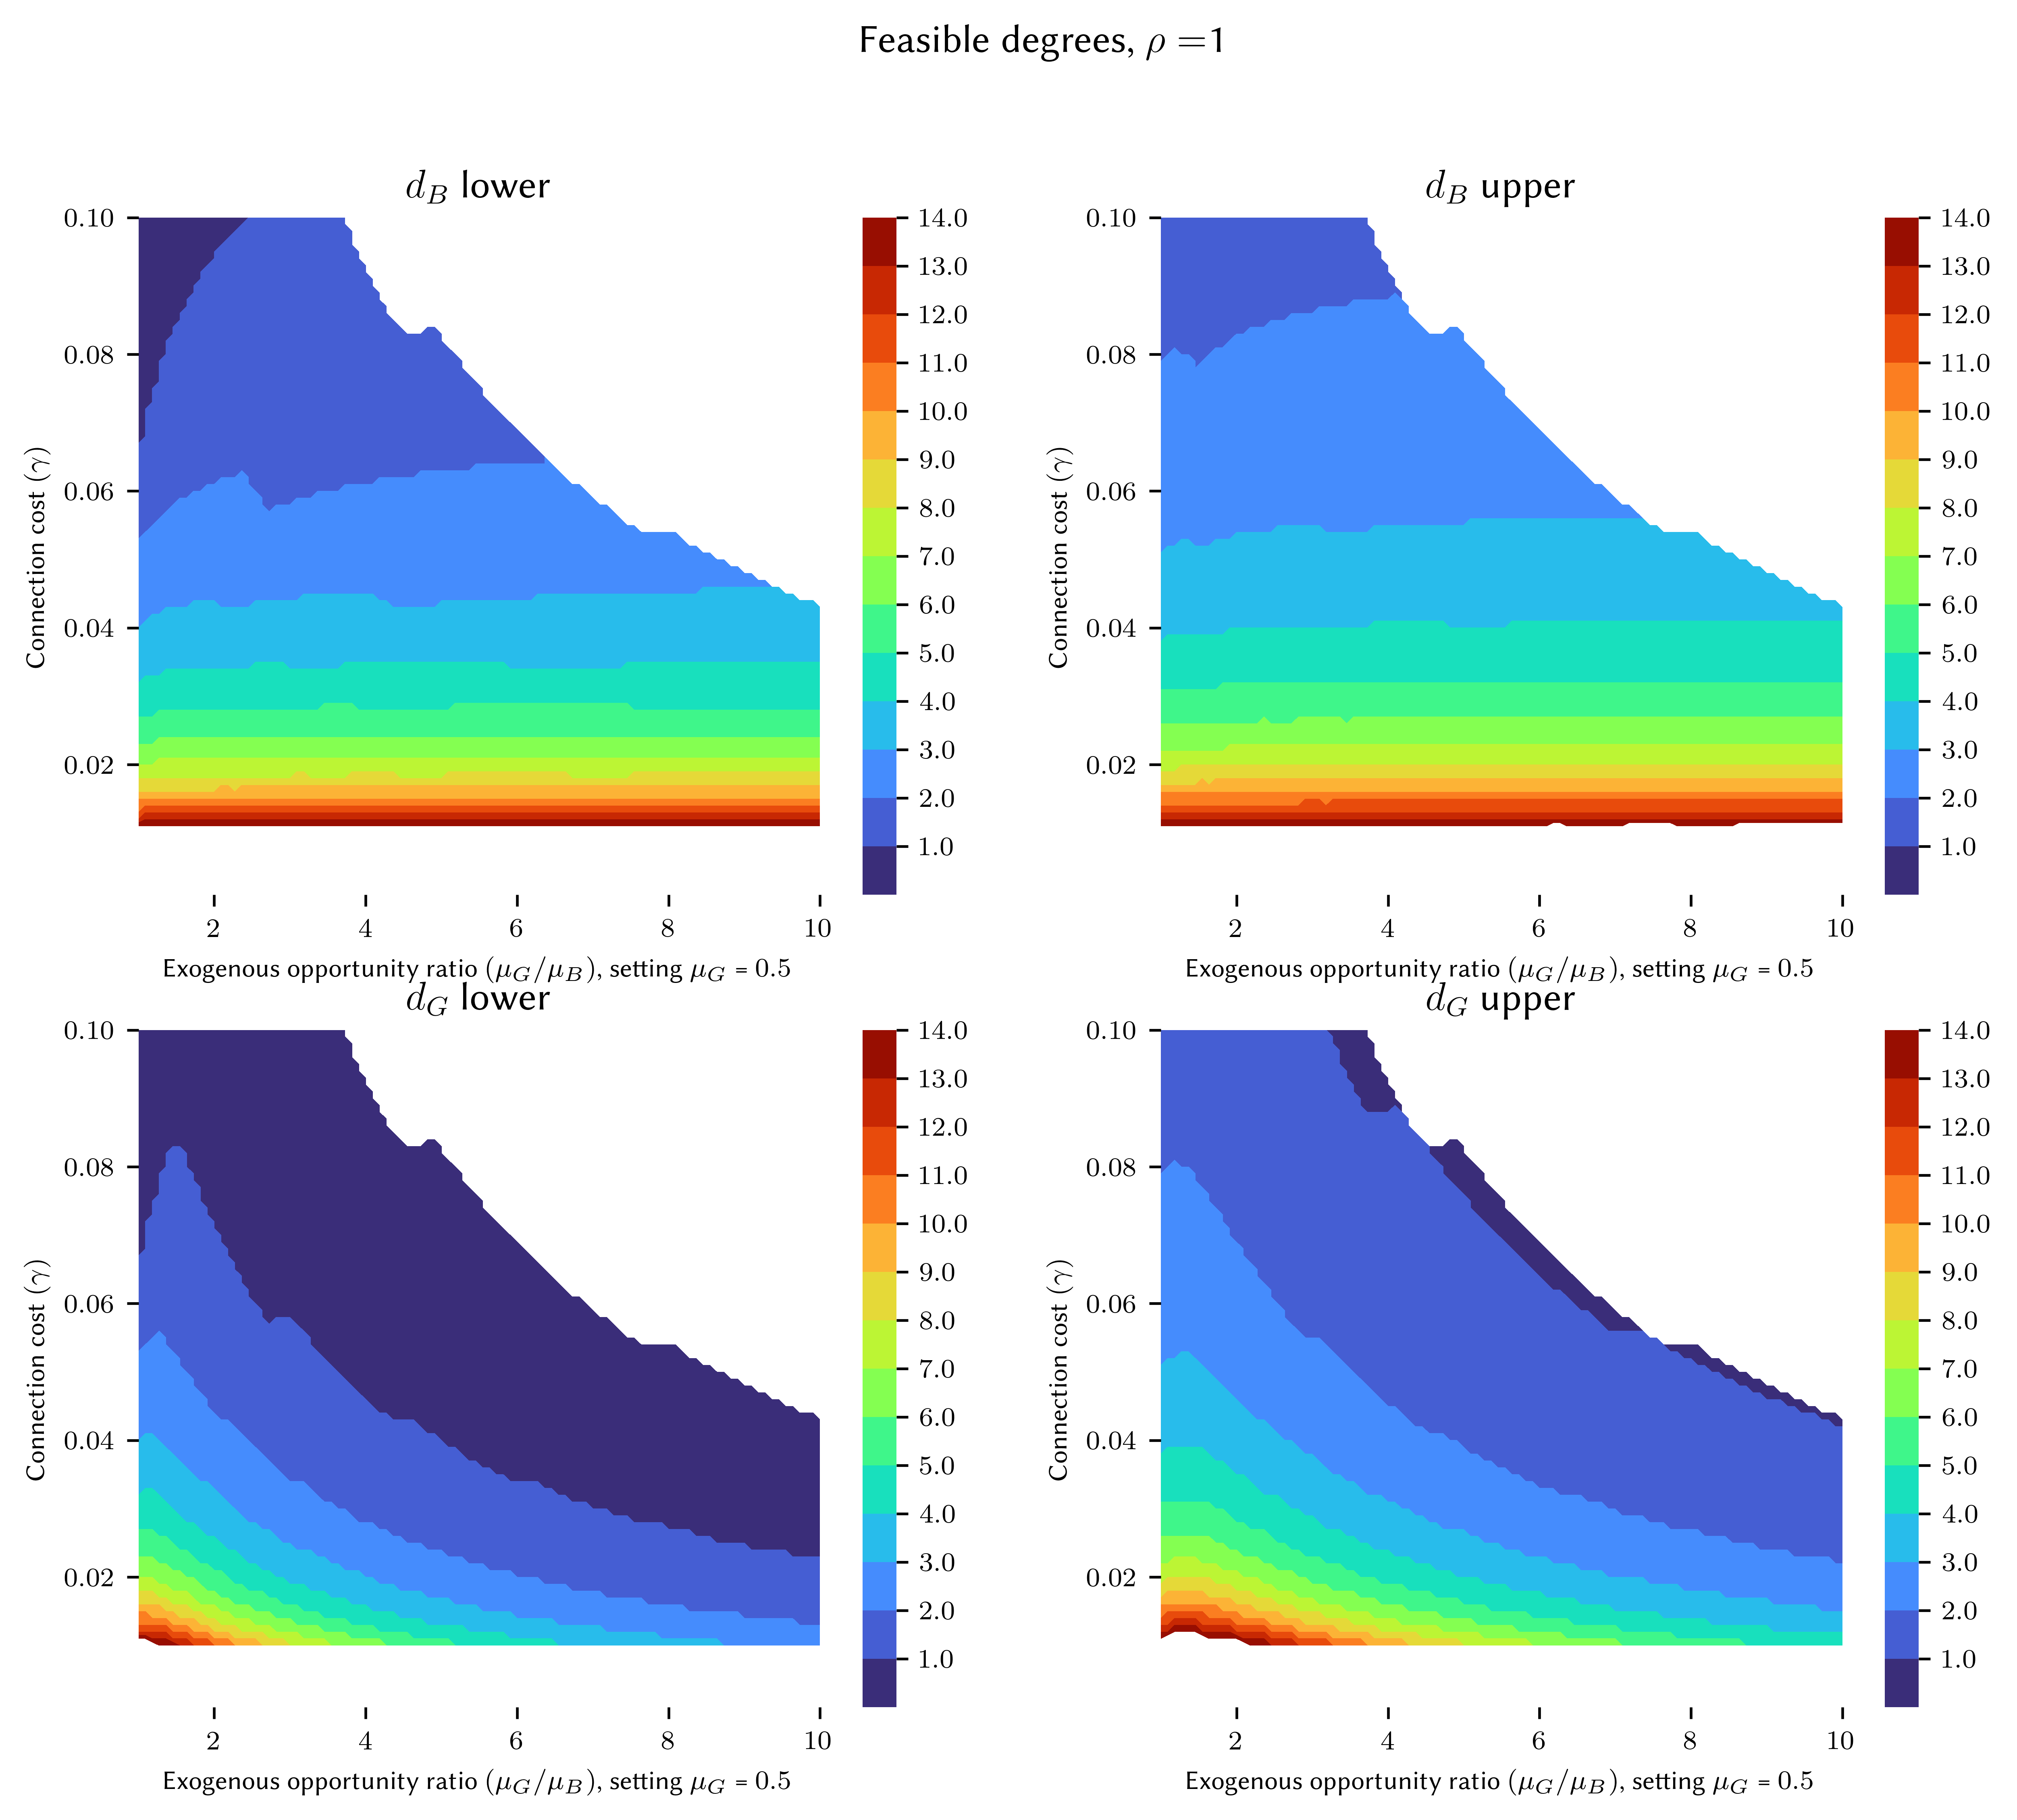

In [64]:
fig1, axes1 = plot_feasible(g_lower_rho1, g_upper_rho1, b_lower_rho1, b_upper_rho1, 1)

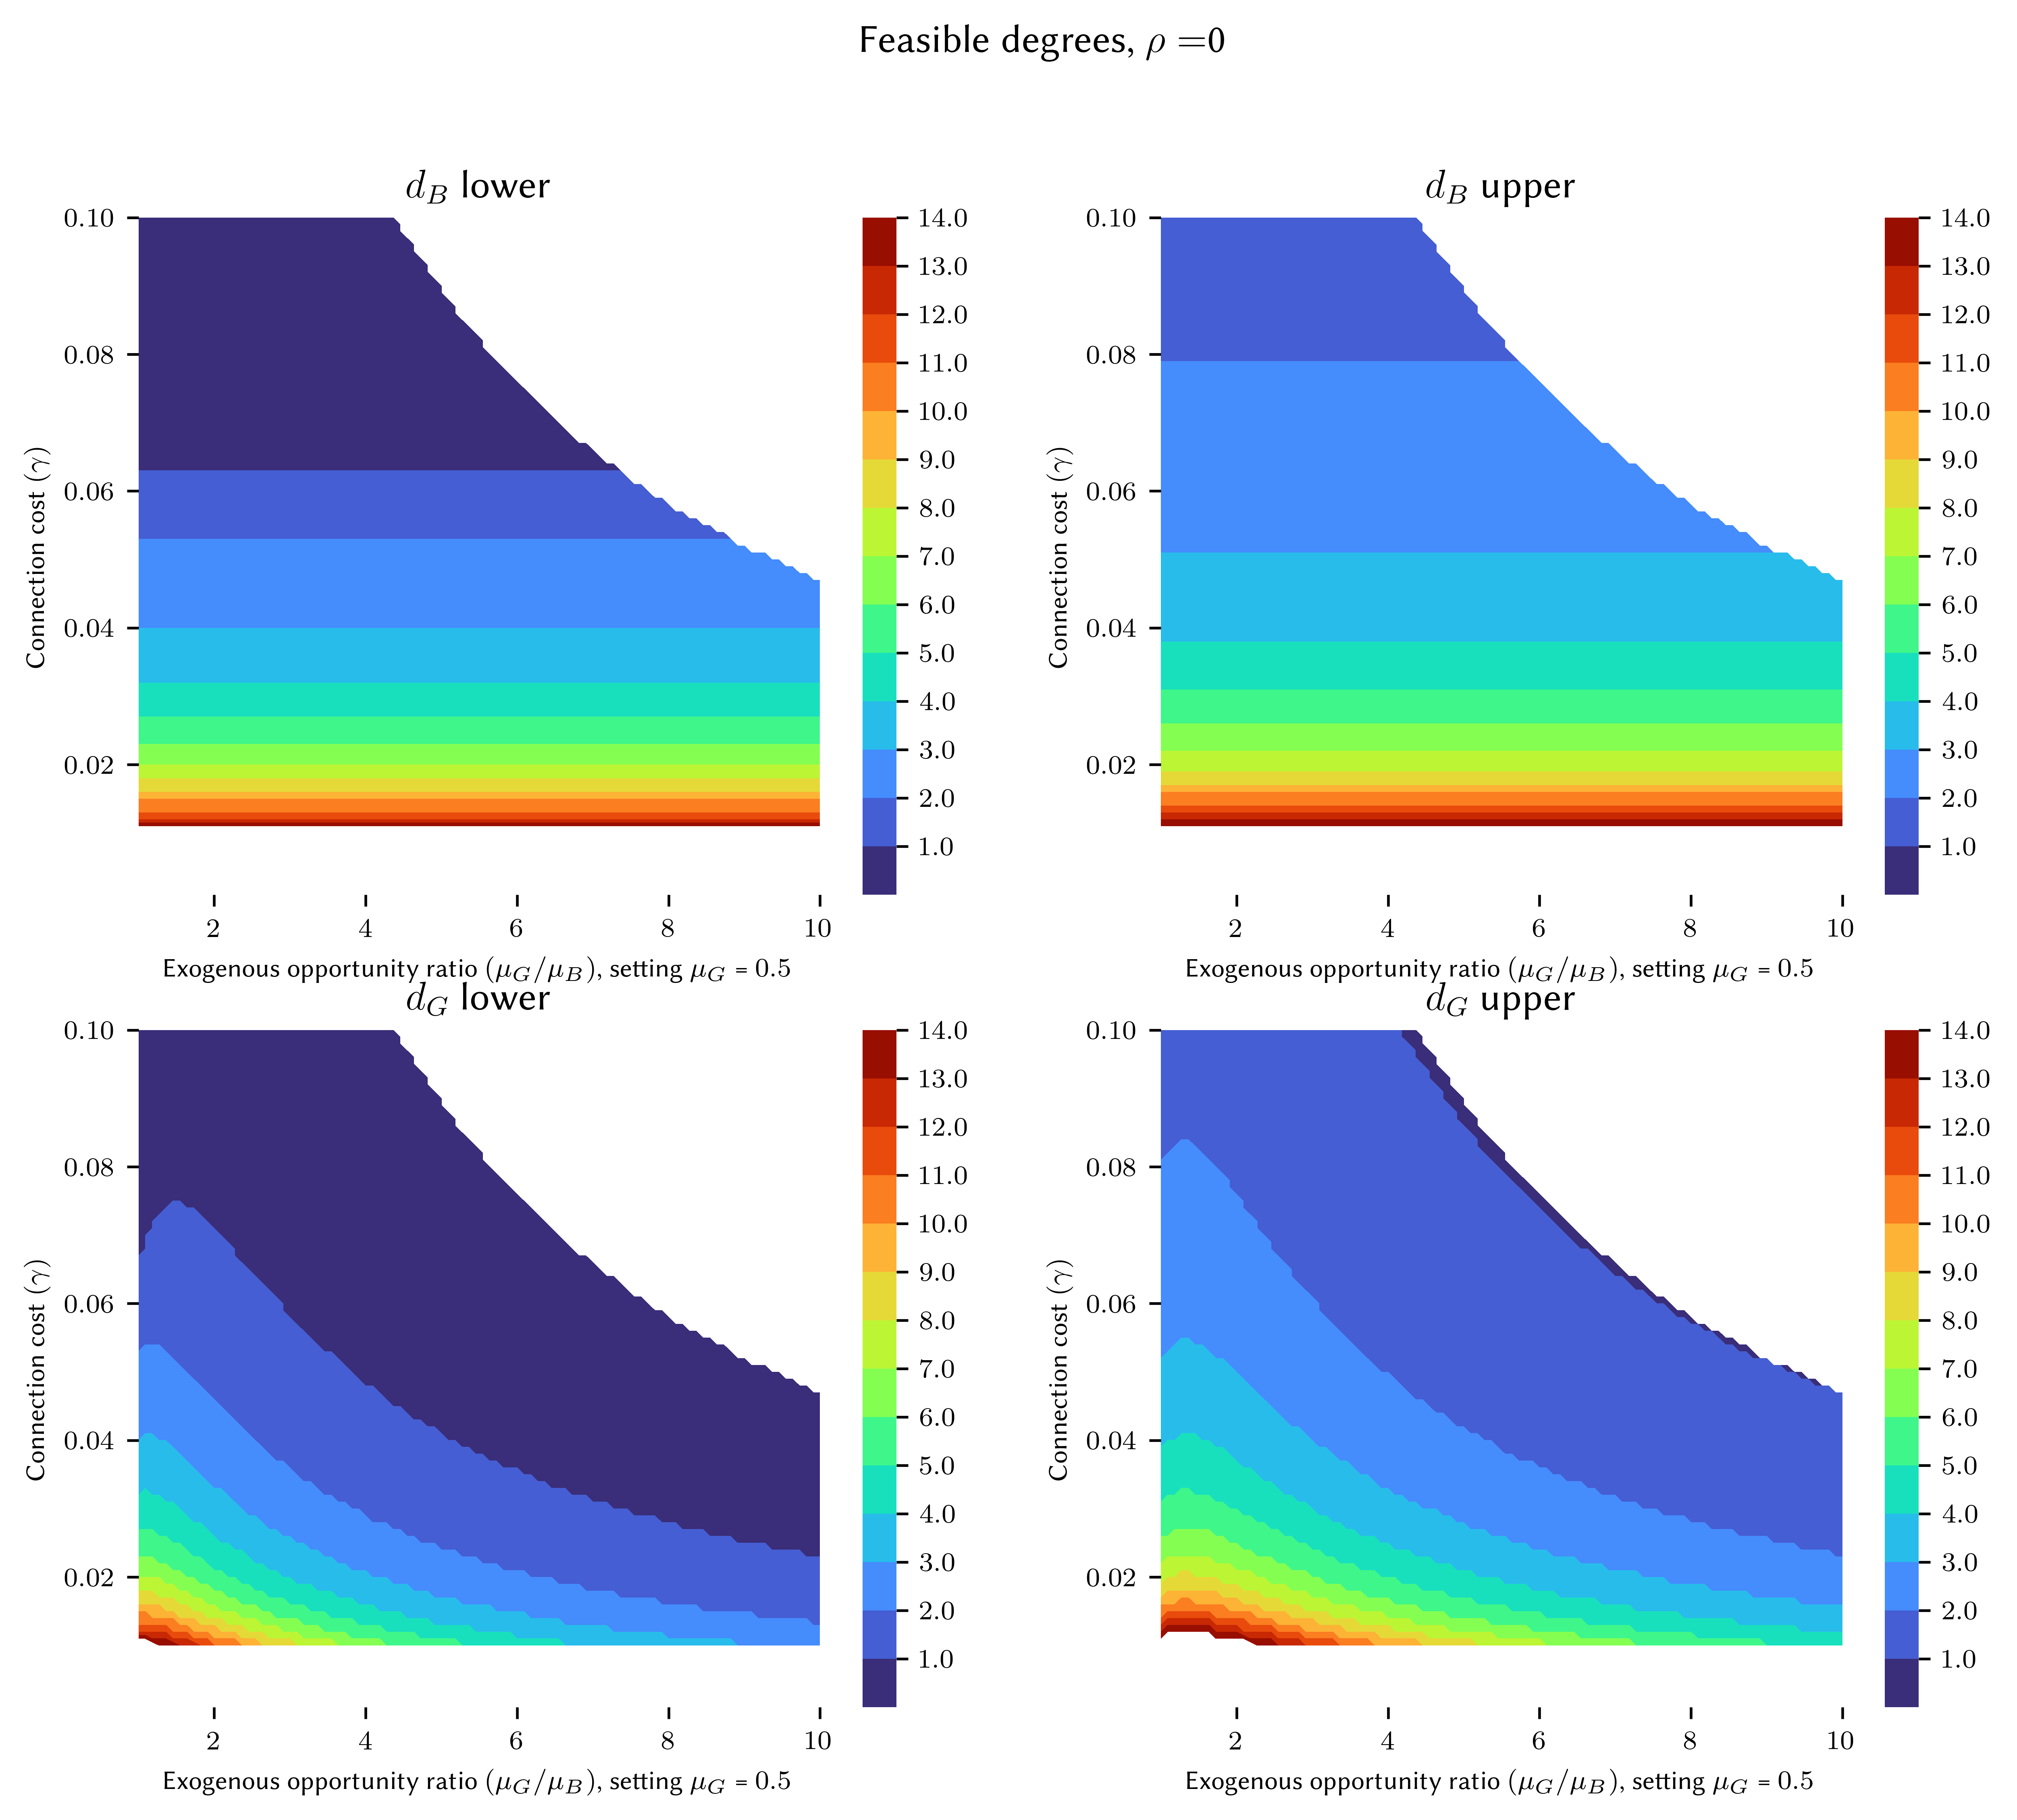

In [65]:
fig0, axes0 = plot_feasible(g_lower_rho0, g_upper_rho0, b_lower_rho0, b_upper_rho0, 0)

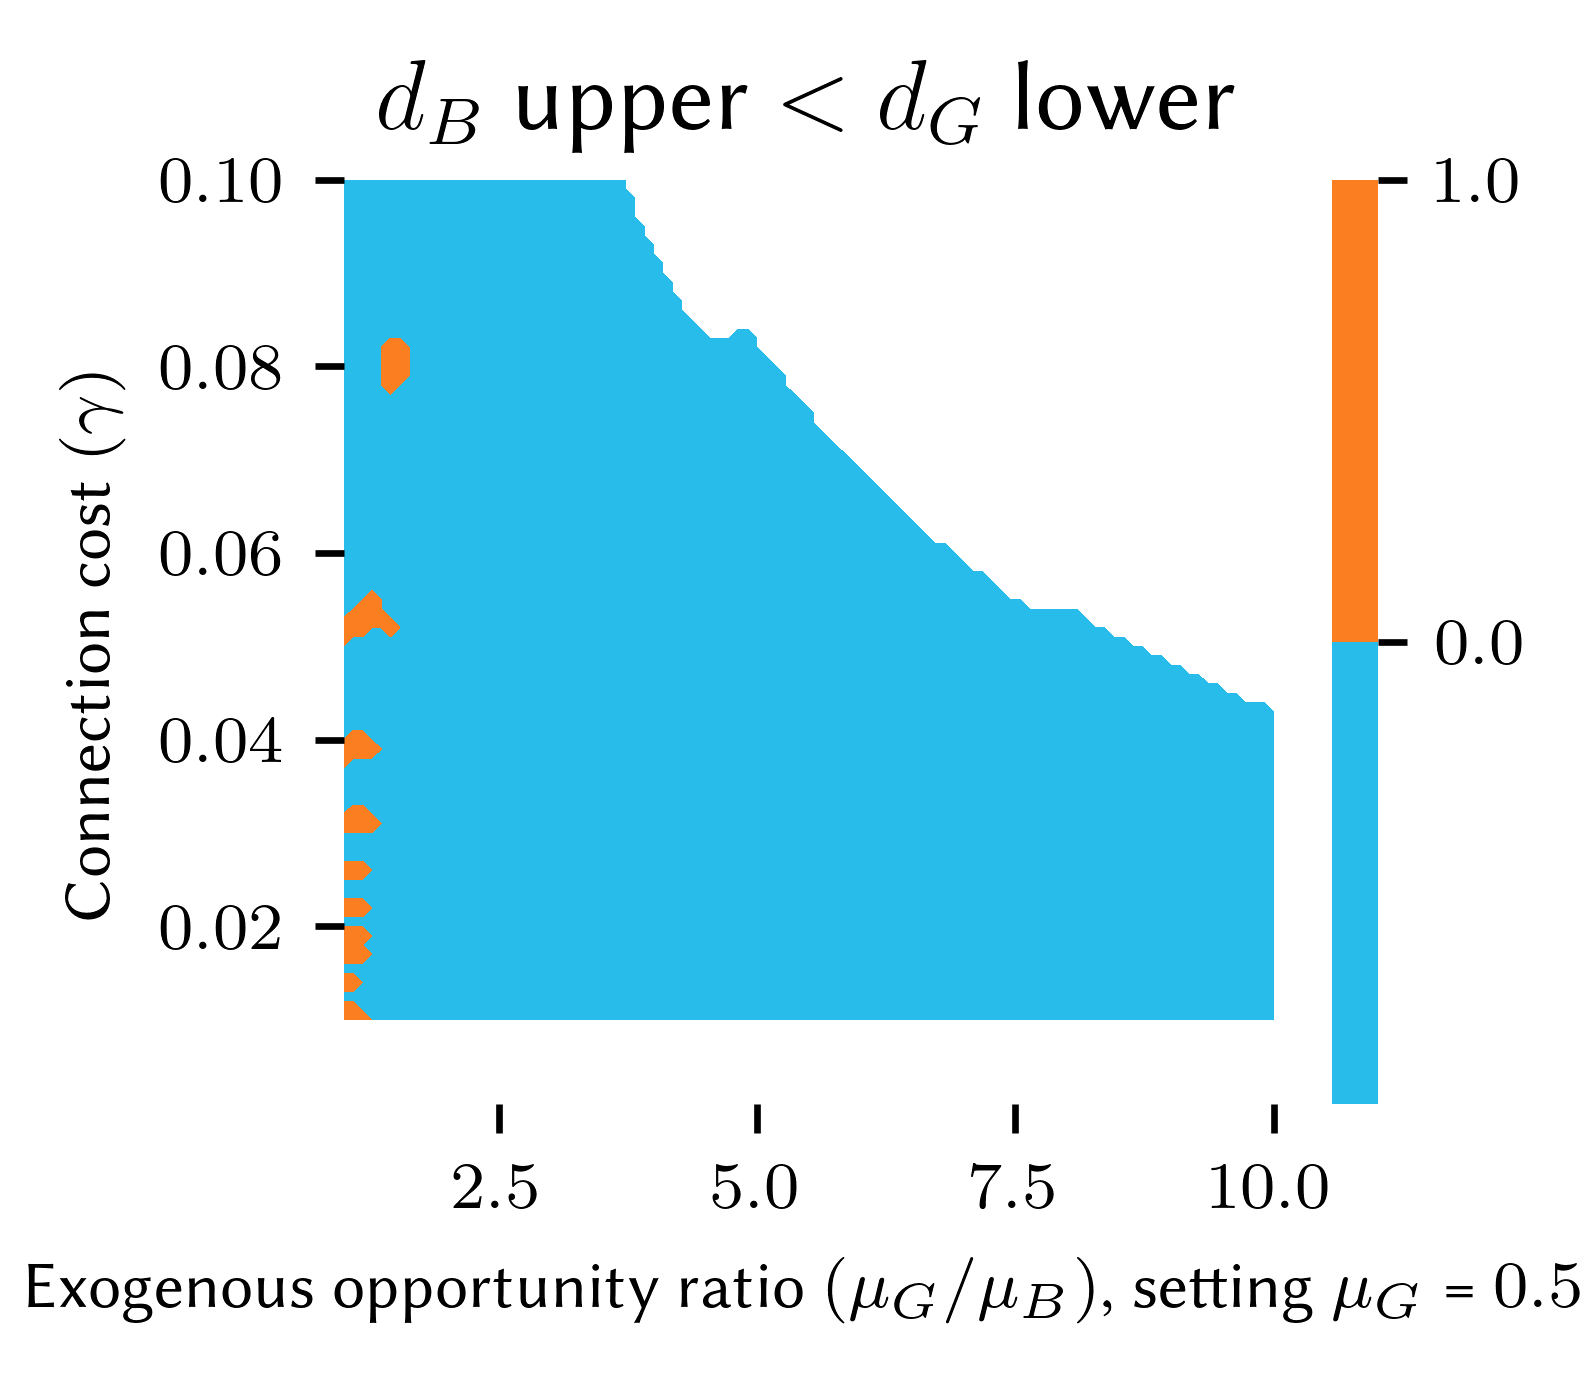

In [66]:
def plot_deg_overlap(g_lower, b_upper):
    fontsize = 8
    levels = [i for i in range(-1, 2)] #np.linspace(1, poa_max, 5)
    ticks = [0, 1] #np.linspace(1, poa_max, 5)
    tick_labs = [f"${f:.1f}$" for f in ticks]

    fig, ax = plt.subplots(1,1, dpi=600, figsize=(2.5, 2))
    # Create new arrays replacing inf with nan
    g_lower_nan = np.where(np.isinf(g_lower), np.nan, g_lower)
    b_upper_nan = np.where(np.isinf(b_upper), np.nan, b_upper)
    overlap = np.where(np.isnan(g_lower_nan) | np.isnan(b_upper_nan), np.nan, g_lower_nan >= b_upper_nan)
    degs_title = "$d_B$ upper $<$ $d_G$ lower"
    contour = ax.contourf(factors_mesh, gammas_mesh, overlap, levels=levels, cmap=cm.turbo)
    ax.set_xlabel(r"Exogenous opportunity ratio $(\mu_G / \mu_B)$, setting $\mu_G$ = " + f"${g2 * 2 - 1 + (1-g2)}$", fontsize=fontsize)
    ax.set_ylabel(r"Connection cost $(\gamma)$", fontsize=fontsize)
    ax.set_title(degs_title)
    cbar = fig.colorbar(contour, ticks=ticks)
    cbar.ax.set_yticklabels(tick_labs)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    cbar.ax.tick_params(axis='both', which='major', labelsize=fontsize)
    for spine in ax.spines.values():
        spine.set_visible(False)
    for spine in cbar.ax.spines.values():
        spine.set_visible(False)

    return fig, ax

fig, ax = plot_deg_overlap(g_lower_rho1, b_upper_rho1)


# With cross group edges, can the network reduce inequality, relative to their exogenous levels? (For all equilibria)

In [15]:
# Upper bound on utility for group G
def util_g_ub(b2, g2, gamma, deg_b_upper, deg_b_lower, deg_g_upper, deg_g_lower, rho, M=10):
    return 1 - (1-g2) * (1 - g2/(max(deg_g_lower-1, 1)))**(deg_g_lower - k) * (1 - b2 / deg_b_lower)**(rho * k)* (1 - g2 / deg_g_lower)**((1-rho) * k) - gamma * (deg_g_lower - k)

# Lower bound on utility for group B
def util_b_lb(b2, g2, gamma, deg_b_upper, deg_b_lower, deg_g_upper, deg_g_lower, rho, M=10):
    return 1 - (1-b2) * (1 - b2/(deg_b_upper+1))**(deg_b_upper - k) * (1 - g2 / deg_g_upper)**(rho * k) * (1 - b2 / deg_b_upper)**((1-rho) * k) - gamma * (deg_b_upper - k)

# Lower bound on utility ratio
def util_ratio(b2, g2, gamma, rho, M=10):
    ret = find_feasible_b(b2, g2, gamma, rho, M)
    if ret:
        (deg_b_upper, deg_b_lower, deg_g_upper, deg_g_lower) = ret
        return util_g_ub(b2, g2, gamma, deg_b_upper, deg_b_lower, deg_g_upper, deg_g_lower, rho, M=10) / util_b_lb(b2, g2, gamma, deg_b_upper, deg_b_lower, deg_g_upper, deg_g_lower, rho, M=10)
    return -np.inf

In [33]:
rho = 1

# Compute utility ratio over grid
def util_ratio_grid(rho):
    g2 = 0.5
    grid_size = 100
    gammas = np.linspace(0.01, 0.05, grid_size)
    factors = np.linspace(1, 10, grid_size)
    M = 10

    factors_mesh, gammas_mesh = np.meshgrid(factors, gammas)
    ratio = np.full([grid_size, grid_size], -np.inf)

    for i in range(grid_size):
        for j in range(grid_size):
            ratio[i][j] = util_ratio(g2/factors_mesh[i][j], g2, gammas_mesh[i][j], rho, M=M) / factors_mesh[i][j]

    return ratio, factors_mesh, gammas_mesh

ratio_rho1, factors_mesh_rho1, gammas_mesh_rho1 = util_ratio_grid(1)
ratio_rho0, factors_mesh_rho0, gammas_mesh_rho0 = util_ratio_grid(0)


In [34]:
def plot_util_ratios(ratio, factors_mesh, gammas_mesh, rho, poa_max):
    K = 250
    fontsize = 16
    poa_min = 0.
    levels = np.linspace(poa_min, poa_max, K)
    ticks = np.linspace(poa_min, poa_max, 5)
    tick_labs = [f"${f:.1f}$" for f in ticks]

    fig = plt.figure(figsize=(6, 3), dpi=600)
    ax = fig.add_subplot()
    contour = ax.contourf(factors_mesh, gammas_mesh, ratio, levels=levels, cmap=cm.turbo)
    ax.set_xlabel(r"Exogenous opportunity ratio $(\mu_G / \mu_B)$, setting $\mu_G$ = " + f"${g2 * 2 - 1 + (1-g2)}$", fontsize=fontsize)
    ax.set_ylabel(r"Connection cost $(\gamma)$", fontsize=fontsize)
    ax.set_title("")
    cbar = fig.colorbar(contour, ticks=ticks)
    cbar.ax.set_yticklabels(tick_labs)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    cbar.ax.tick_params(axis='both', which='major', labelsize=fontsize)
    for spine in ax.spines.values():
        spine.set_visible(False)
    for spine in cbar.ax.spines.values():
        spine.set_visible(False)
    fig.suptitle("Inequality (lower is better), $\\rho = $" + f"{rho}")
    return fig, ax


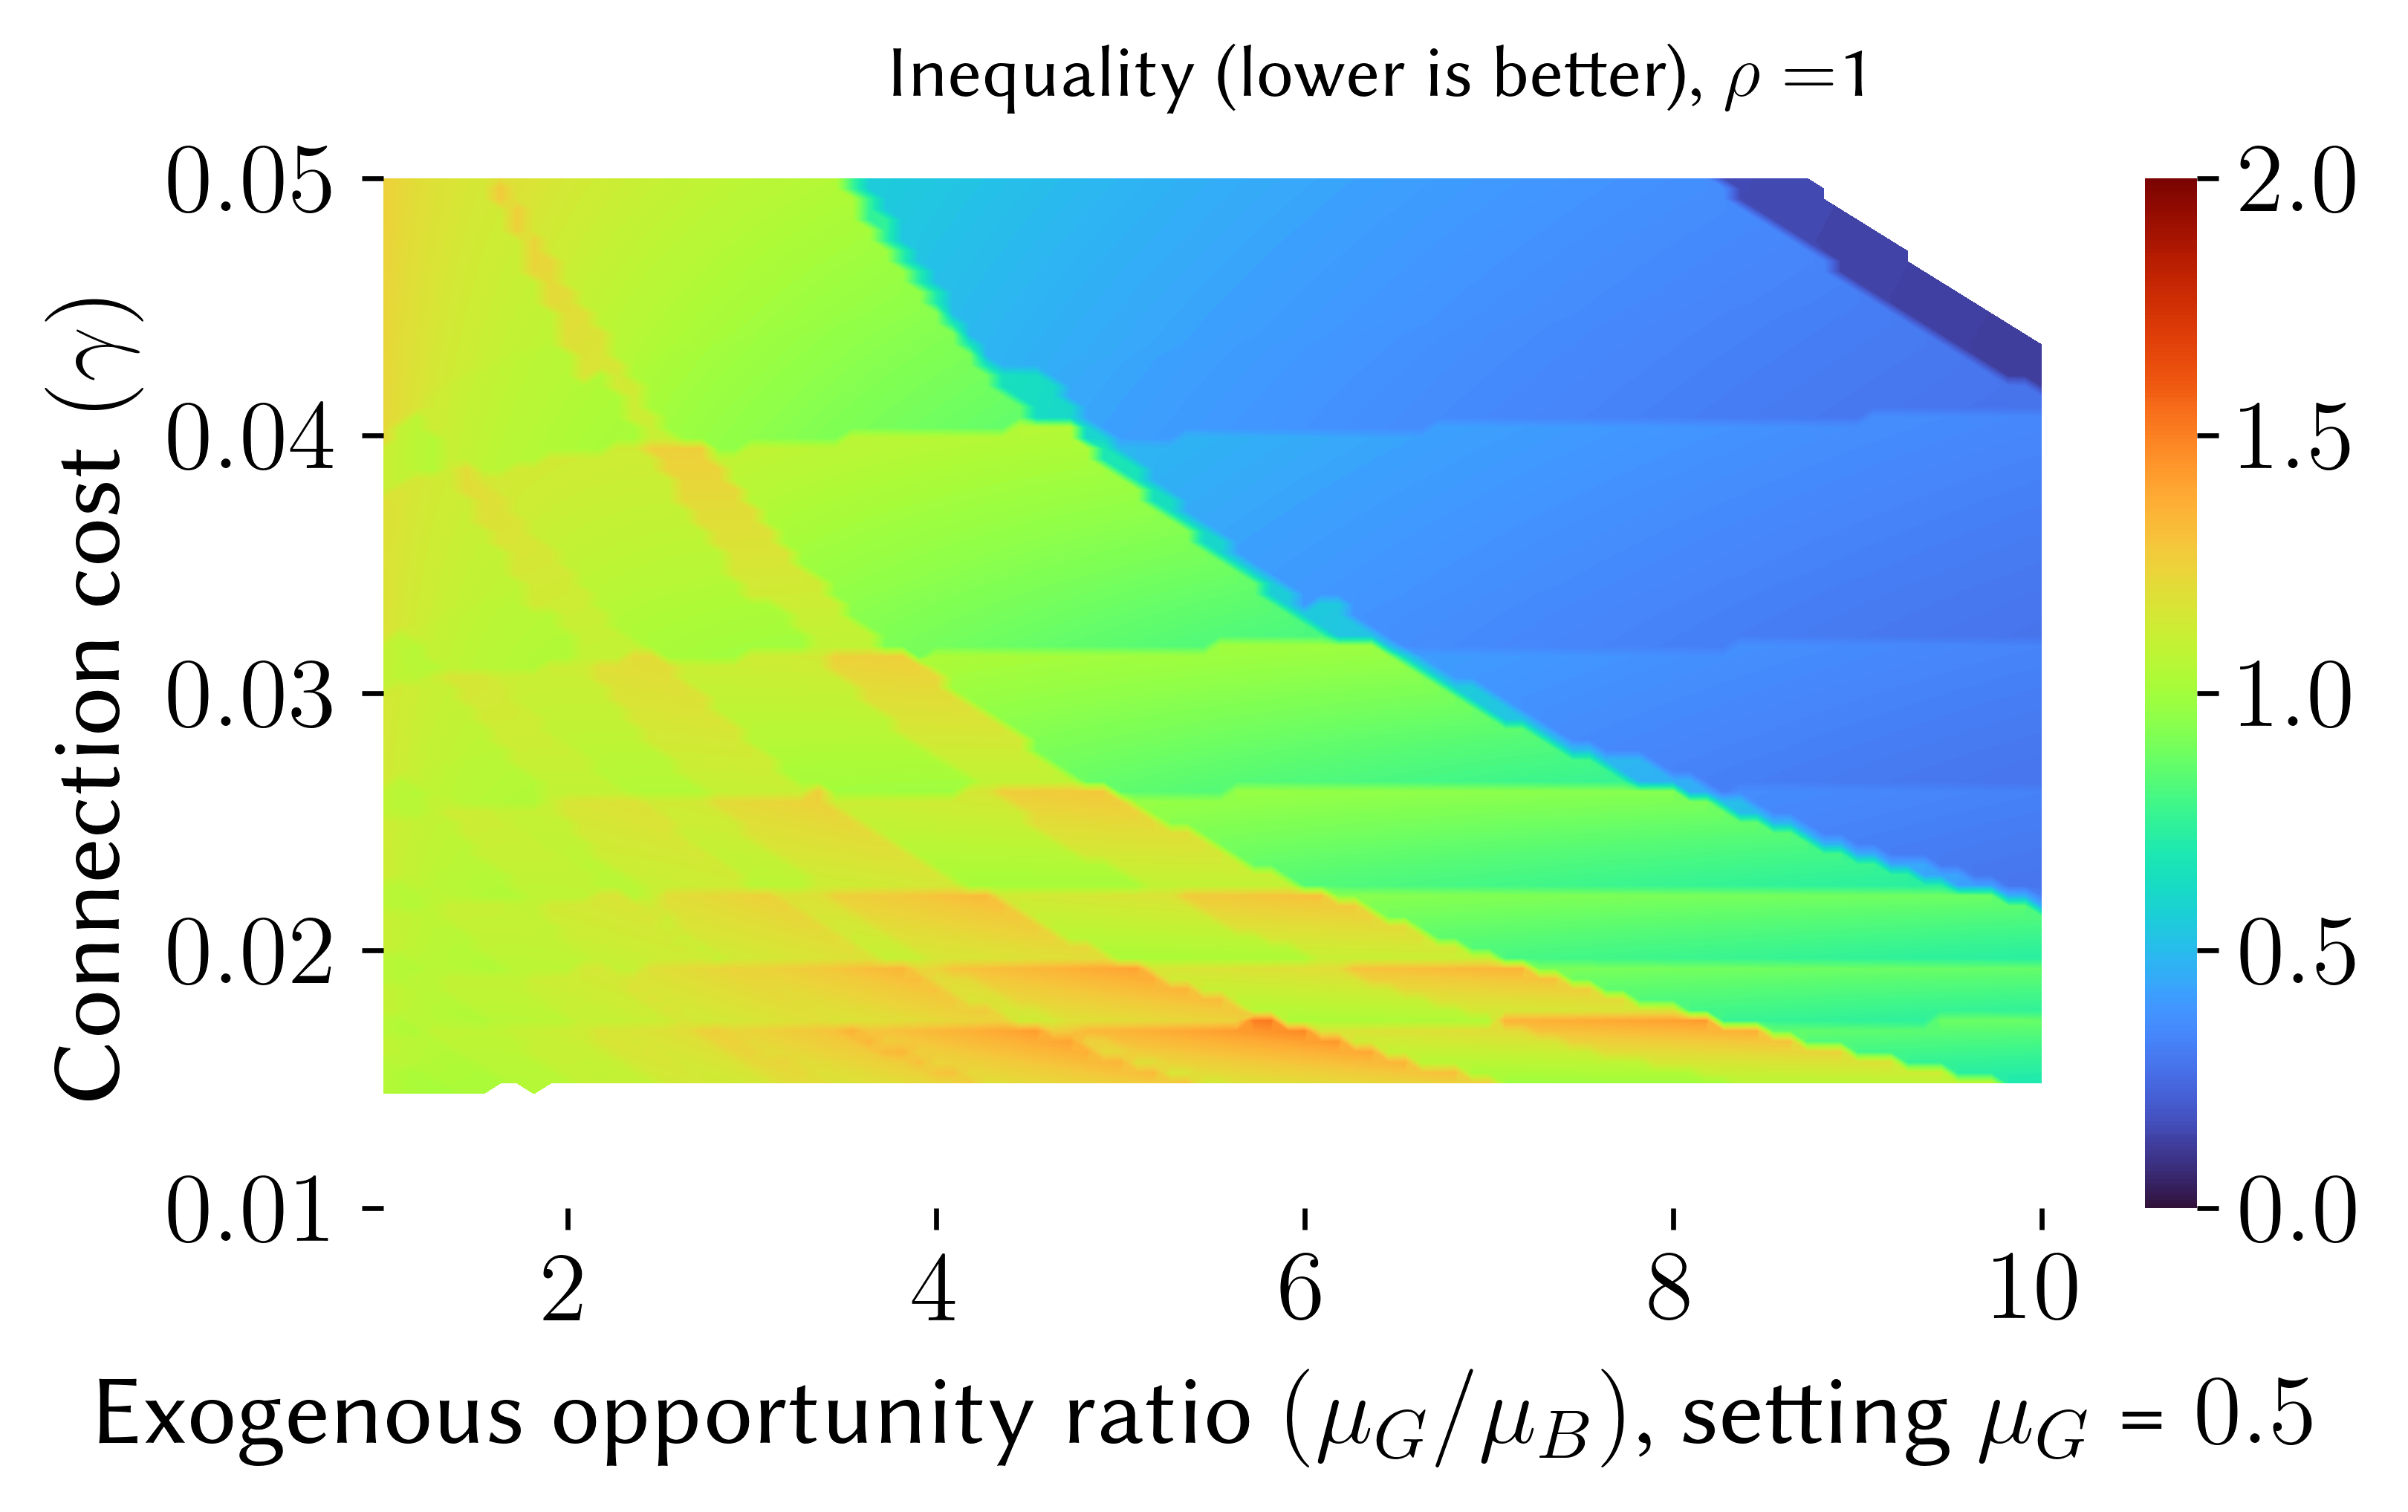

In [38]:
fig, ax = plot_util_ratios(ratio_rho1, factors_mesh_rho1, gammas_mesh_rho1, 1, poa_max=2)

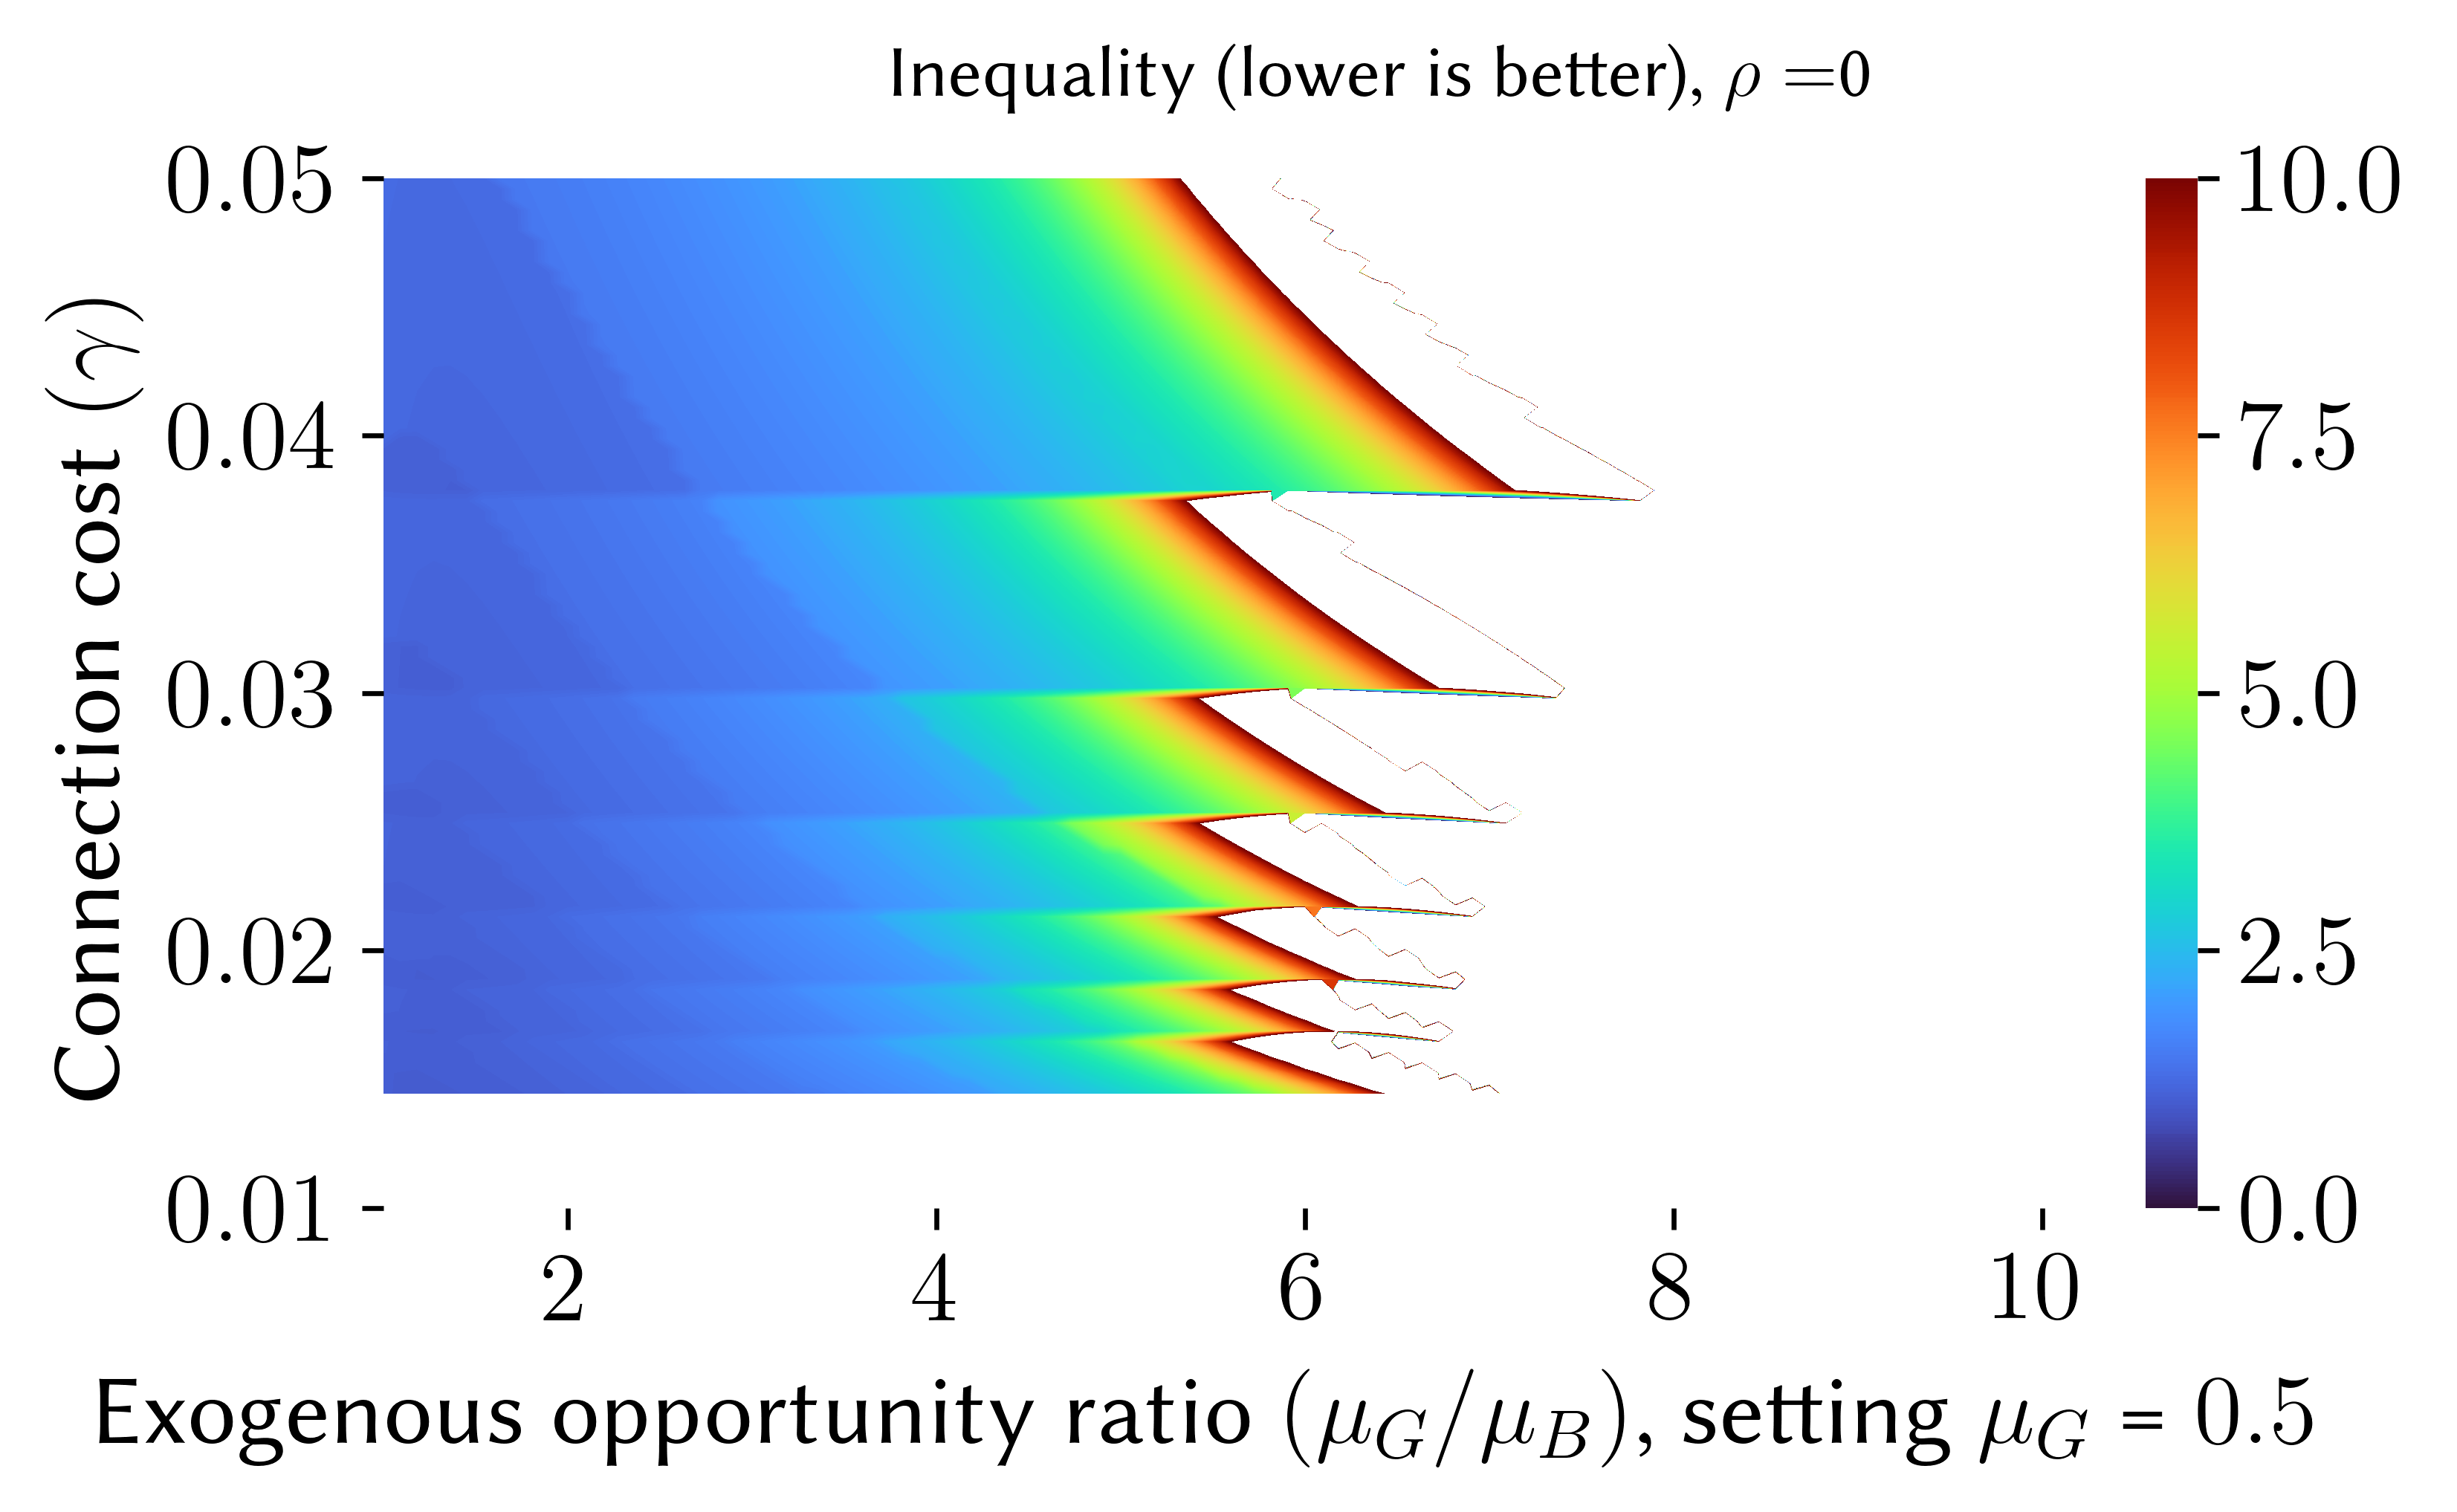

In [36]:
fig, ax = plot_util_ratios(ratio_rho0, factors_mesh_rho0, gammas_mesh_rho0, 0, poa_max=10)